In [1]:
# View the westat version number and installation path
import westat
print('version:',westat.__version__)
print('path:',westat.__path__)

version: 0.1.14
path: ['C:\\Users\\about\\AppData\\Roaming\\Python\\Python39\\site-packages\\westat']


## 一、Data preparation

In [2]:
from westat import *

data=credit_card()
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
# Rename the target variable to 'y'
data.rename(columns={'target':'y'},inplace=True)
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,y
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## 二、Data exploration

In [4]:
# view data
proc_means(data,['LIMIT_BAL','AGE'])

,Variable,N,Mean,Std Dev,Minimum,Maximum
0,LIMIT_BAL,30000,167484.32,129747.66,10000.0,1000000.0
1,AGE,30000,35.49,9.22,21.0,79.0


In [5]:
# View data details
get_data_desc(data).head(20)

,Name,Describe,Type,Role,#Count,#N,%N,#Missing,%Missing,#Unique,...,#Sum,#Min,#Mean,#Q1,#Median,#Q3,#Max,Top1,Top2,Top3
0,ID,,int64,feature,30000,30000,100.00%,0,0.00%,30000,...,4.500150e+08,1.0,15000.50,7500.75,15000.5,22500.25,30000.0,1.0,19997.0,20009.0
1,LIMIT_BAL,,float64,feature,30000,30000,100.00%,0,0.00%,81,...,5.024530e+09,10000.0,167484.32,50000.00,140000.0,240000.00,1000000.0,50000.0,20000.0,30000.0
2,SEX,,int64,feature,30000,30000,100.00%,0,0.00%,2,...,4.811200e+04,1.0,1.60,1.00,2.0,2.00,2.0,2.0,1.0,NaN
3,EDUCATION,,int64,feature,30000,30000,100.00%,0,0.00%,7,...,5.559400e+04,0.0,1.85,1.00,2.0,2.00,6.0,2.0,1.0,3.0
4,MARRIAGE,,int64,feature,30000,30000,100.00%,0,0.00%,4,...,4.655600e+04,0.0,1.55,1.00,2.0,2.00,3.0,2.0,1.0,3.0
5,AGE,,int64,feature,30000,30000,100.00%,0,0.00%,56,...,1.064565e+06,21.0,35.49,28.00,34.0,41.00,79.0,29.0,27.0,28.0
6,PAY_0,,int64,feature,30000,30000,100.00%,0,0.00%,11,...,-5.010000e+02,-2.0,-0.02,-1.00,0.0,0.00,8.0,0.0,-1.0,1.0
7,PAY_2,,int64,feature,30000,30000,100.00%,0,0.00%,11,...,-4.013000e+03,-2.0,-0.13,-1.00,0.0,0.00,8.0,0.0,-1.0,2.0
8,PAY_3,,int64,feature,30000,30000,100.00%,0,0.00%,11,...,-4.986000e+03,-2.0,-0.17,-1.00,0.0,0.00,8.0,0.0,-1.0,-2.0
9,PAY_4,,int64,feature,30000,30000,100.00%,0,0.00%,11,...,-6.620000e+03,-2.0,-0.22,-1.00,0.0,0.00,8.0,0.0,-1.0,-2.0


In [6]:
# View the specified statistics results
get_data_desc(data,key=['#Mean'])

,Name,Describe,Type,Role,#Count,#N,%N,#Missing,%Missing,#Unique,%Unique,#Mean
0,ID,,int64,feature,30000,30000,100.00%,0,0.00%,30000,100.00%,15000.50
1,LIMIT_BAL,,float64,feature,30000,30000,100.00%,0,0.00%,81,0.27%,167484.32
2,SEX,,int64,feature,30000,30000,100.00%,0,0.00%,2,0.01%,1.60
3,EDUCATION,,int64,feature,30000,30000,100.00%,0,0.00%,7,0.02%,1.85
4,MARRIAGE,,int64,feature,30000,30000,100.00%,0,0.00%,4,0.01%,1.55
5,AGE,,int64,feature,30000,30000,100.00%,0,0.00%,56,0.19%,35.49
6,PAY_0,,int64,feature,30000,30000,100.00%,0,0.00%,11,0.04%,-0.02
7,PAY_2,,int64,feature,30000,30000,100.00%,0,0.00%,11,0.04%,-0.13
8,PAY_3,,int64,feature,30000,30000,100.00%,0,0.00%,11,0.04%,-0.17
9,PAY_4,,int64,feature,30000,30000,100.00%,0,0.00%,11,0.04%,-0.22


In [7]:
# View data details, specify missing values and data precision
get_data_desc(data,missing=[],precision=0)

,Name,Describe,Type,Role,#Count,#N,%N,#Missing,%Missing,#Unique,...,#Sum,#Min,#Mean,#Q1,#Median,#Q3,#Max,Top1,Top2,Top3
0,ID,,int64,feature,30000,30000,100%,0,0%,30000,...,4.500150e+08,1.0,15000.0,7501.0,15000.0,22500.0,30000.0,1.0,19997.0,20009.0
1,LIMIT_BAL,,float64,feature,30000,30000,100%,0,0%,81,...,5.024530e+09,10000.0,167484.0,50000.0,140000.0,240000.0,1000000.0,50000.0,20000.0,30000.0
2,SEX,,int64,feature,30000,30000,100%,0,0%,2,...,4.811200e+04,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,NaN
3,EDUCATION,,int64,feature,30000,30000,100%,0,0%,7,...,5.559400e+04,0.0,2.0,1.0,2.0,2.0,6.0,2.0,1.0,3.0
4,MARRIAGE,,int64,feature,30000,30000,100%,0,0%,4,...,4.655600e+04,0.0,2.0,1.0,2.0,2.0,3.0,2.0,1.0,3.0
5,AGE,,int64,feature,30000,30000,100%,0,0%,56,...,1.064565e+06,21.0,35.0,28.0,34.0,41.0,79.0,29.0,27.0,28.0
6,PAY_0,,int64,feature,30000,30000,100%,0,0%,11,...,-5.010000e+02,-2.0,-0.0,-1.0,0.0,0.0,8.0,0.0,-1.0,1.0
7,PAY_2,,int64,feature,30000,30000,100%,0,0%,11,...,-4.013000e+03,-2.0,-0.0,-1.0,0.0,0.0,8.0,0.0,-1.0,2.0
8,PAY_3,,int64,feature,30000,30000,100%,0,0%,11,...,-4.986000e+03,-2.0,-0.0,-1.0,0.0,0.0,8.0,0.0,-1.0,-2.0
9,PAY_4,,int64,feature,30000,30000,100%,0,0%,11,...,-6.620000e+03,-2.0,-0.0,-1.0,0.0,0.0,8.0,0.0,-1.0,-2.0


In [8]:
# View data details and display more descriptive statistics
get_data_desc(data,key=['#Sum','#Min','#Q1','#Median','#Q3','#Max','#Mode','#Var','#Std','#Mean','#Kurt','#Skew','#StdMean','#Range','#Cv','#Sum_of_squares','Top1','Top2','Top3'])

,Name,Describe,Type,Role,#Count,#N,%N,#Missing,%Missing,#Unique,...,#Mean,#Kurt,#Skew,#StdMean,#Range,#Cv,#Sum_of_squares,Top1,Top2,Top3
0,ID,,int64,feature,30000,30000,100.00%,0,0.00%,30000,...,15000.50,-1.20,0.00,50.00,29999.0,57.73%,9.000450e+12,1.0,19997.0,20009.0
1,LIMIT_BAL,,float64,feature,30000,30000,100.00%,0,0.00%,81,...,167484.32,0.54,0.99,749.10,990000.0,77.47%,1.346547e+15,50000.0,20000.0,30000.0
2,SEX,,int64,feature,30000,30000,100.00%,0,0.00%,2,...,1.60,-1.82,-0.42,0.00,1.0,30.50%,8.433600e+04,2.0,1.0,NaN
3,EDUCATION,,int64,feature,30000,30000,100.00%,0,0.00%,7,...,1.85,2.08,0.97,0.00,6.0,42.65%,1.217620e+05,2.0,1.0,3.0
4,MARRIAGE,,int64,feature,30000,30000,100.00%,0,0.00%,4,...,1.55,-1.36,-0.02,0.00,3.0,33.63%,8.042200e+04,2.0,1.0,3.0
5,AGE,,int64,feature,30000,30000,100.00%,0,0.00%,56,...,35.49,0.04,0.73,0.05,58.0,25.98%,4.032563e+07,29.0,27.0,28.0
6,PAY_0,,int64,feature,30000,30000,100.00%,0,0.00%,11,...,-0.02,2.72,0.73,0.01,10.0,-6729.35%,3.789500e+04,0.0,-1.0,1.0
7,PAY_2,,int64,feature,30000,30000,100.00%,0,0.00%,11,...,-0.13,1.57,0.79,0.01,10.0,-894.98%,4.353300e+04,0.0,-1.0,2.0
8,PAY_3,,int64,feature,30000,30000,100.00%,0,0.00%,11,...,-0.17,2.08,0.84,0.01,10.0,-720.14%,4.380200e+04,0.0,-1.0,-2.0
9,PAY_4,,int64,feature,30000,30000,100.00%,0,0.00%,11,...,-0.22,3.50,1.00,0.01,10.0,-529.82%,4.246600e+04,0.0,-1.0,-2.0


In [9]:
# View data details
get_data_describe(data).head(20)

,Name,Describe,Type,Role,#Count,#N,%N,#Missing,%Missing,#Unique,...,#Sum,#Min,#Mean,#Q1,#Median,#Q3,#Max,Top1,Top2,Top3
0,ID,,int64,feature,30000,30000,100.00%,0,0.00%,30000,...,4.500150e+08,1.0,15000.50,7500.75,15000.5,22500.25,30000.0,1.0,19997.0,20009.0
1,LIMIT_BAL,,float64,feature,30000,30000,100.00%,0,0.00%,81,...,5.024530e+09,10000.0,167484.32,50000.00,140000.0,240000.00,1000000.0,50000.0,20000.0,30000.0
2,SEX,,int64,feature,30000,30000,100.00%,0,0.00%,2,...,4.811200e+04,1.0,1.60,1.00,2.0,2.00,2.0,2.0,1.0,NaN
3,EDUCATION,,int64,feature,30000,30000,100.00%,0,0.00%,7,...,5.559400e+04,0.0,1.85,1.00,2.0,2.00,6.0,2.0,1.0,3.0
4,MARRIAGE,,int64,feature,30000,30000,100.00%,0,0.00%,4,...,4.655600e+04,0.0,1.55,1.00,2.0,2.00,3.0,2.0,1.0,3.0
5,AGE,,int64,feature,30000,30000,100.00%,0,0.00%,56,...,1.064565e+06,21.0,35.49,28.00,34.0,41.00,79.0,29.0,27.0,28.0
6,PAY_0,,int64,feature,30000,30000,100.00%,0,0.00%,11,...,-5.010000e+02,-2.0,-0.02,-1.00,0.0,0.00,8.0,0.0,-1.0,1.0
7,PAY_2,,int64,feature,30000,30000,100.00%,0,0.00%,11,...,-4.013000e+03,-2.0,-0.13,-1.00,0.0,0.00,8.0,0.0,-1.0,2.0
8,PAY_3,,int64,feature,30000,30000,100.00%,0,0.00%,11,...,-4.986000e+03,-2.0,-0.17,-1.00,0.0,0.00,8.0,0.0,-1.0,-2.0
9,PAY_4,,int64,feature,30000,30000,100.00%,0,0.00%,11,...,-6.620000e+03,-2.0,-0.22,-1.00,0.0,0.00,8.0,0.0,-1.0,-2.0


In [10]:
# Create a DataFrame containing the English name of the feature and the feature description Label
# Set the data dictionary of the column, including the Name and Label columns, which are used to save the English name and description of the feature
col_dict = pd.DataFrame(data={'Name':['LIMIT_BAL','AGE','PAY_0'],'Label':['Credit balance','Customer age','Payment amount']})

# Show feature description in data description
get_data_describe(data,col_dict)

C:\Users\about\AppData\Roaming\Python\Python39\site-packages\westat\explore\get_data_describe.py:168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Describe'][result.iloc[:, -1].notnull()] = result.iloc[:, -1]


,Name,Describe,Type,Role,#Count,#N,%N,#Missing,%Missing,#Unique,...,#Sum,#Min,#Mean,#Q1,#Median,#Q3,#Max,Top1,Top2,Top3
0,ID,,int64,feature,30000,30000,100.00%,0,0.00%,30000,...,4.500150e+08,1.0,15000.50,7500.75,15000.5,22500.25,30000.0,1.0,19997.0,20009.0
1,LIMIT_BAL,Credit balance,float64,feature,30000,30000,100.00%,0,0.00%,81,...,5.024530e+09,10000.0,167484.32,50000.00,140000.0,240000.00,1000000.0,50000.0,20000.0,30000.0
2,SEX,,int64,feature,30000,30000,100.00%,0,0.00%,2,...,4.811200e+04,1.0,1.60,1.00,2.0,2.00,2.0,2.0,1.0,NaN
3,EDUCATION,,int64,feature,30000,30000,100.00%,0,0.00%,7,...,5.559400e+04,0.0,1.85,1.00,2.0,2.00,6.0,2.0,1.0,3.0
4,MARRIAGE,,int64,feature,30000,30000,100.00%,0,0.00%,4,...,4.655600e+04,0.0,1.55,1.00,2.0,2.00,3.0,2.0,1.0,3.0
5,AGE,Customer age,int64,feature,30000,30000,100.00%,0,0.00%,56,...,1.064565e+06,21.0,35.49,28.00,34.0,41.00,79.0,29.0,27.0,28.0
6,PAY_0,Payment amount,int64,feature,30000,30000,100.00%,0,0.00%,11,...,-5.010000e+02,-2.0,-0.02,-1.00,0.0,0.00,8.0,0.0,-1.0,1.0
7,PAY_2,,int64,feature,30000,30000,100.00%,0,0.00%,11,...,-4.013000e+03,-2.0,-0.13,-1.00,0.0,0.00,8.0,0.0,-1.0,2.0
8,PAY_3,,int64,feature,30000,30000,100.00%,0,0.00%,11,...,-4.986000e+03,-2.0,-0.17,-1.00,0.0,0.00,8.0,0.0,-1.0,-2.0
9,PAY_4,,int64,feature,30000,30000,100.00%,0,0.00%,11,...,-6.620000e+03,-2.0,-0.22,-1.00,0.0,0.00,8.0,0.0,-1.0,-2.0


## View data distribution

In [11]:
# View the data distribution of the target variable
get_data_dist(data)

,No.,Name,Value,#Count,%Ratio
0,1,y,1,6636,22.12%
1,2,y,0,23364,77.88%
2,3,Total,,30000,100.00%


In [12]:
# Display the data distribution of the target variable according to the complete function name
get_data_distribution(data)

,No.,Name,Value,#Count,%Ratio
0,1,y,1,6636,22.12%
1,2,y,0,23364,77.88%
2,3,Total,,30000,100.00%


In [13]:
get_data_distribution(data,col='SEX')

,No.,Name,Value,#Count,%Ratio
0,1,SEX,1,11888,39.63%
1,2,SEX,2,18112,60.37%
2,3,Total,,30000,100.00%


In [14]:
get_data_dist(data,col='MARRIAGE')

,No.,Name,Value,#Count,%Ratio
0,1,MARRIAGE,0,54,0.18%
1,2,MARRIAGE,3,323,1.08%
2,3,MARRIAGE,1,13659,45.53%
3,4,MARRIAGE,2,15964,53.21%
4,5,Total,,30000,100.00%


In [15]:
get_data_distribution(data,col='MARRIAGE',precision=2,by=['#Count'],ascending =[False])

,No.,Name,Value,#Count,%Ratio
0,1,MARRIAGE,2,15964,53.21%
1,2,MARRIAGE,1,13659,45.53%
2,3,MARRIAGE,3,323,1.08%
3,4,MARRIAGE,0,54,0.18%
4,5,Total,,30000,100.00%


## Data partitioning

In [16]:
data_train,data_test = get_data_partition(data,0.25)
get_data_dist(data_train)

,No.,Name,Value,#Count,%Ratio
0,1,y,1,4936,21.94%
1,2,y,0,17564,78.06%
2,3,Total,,22500,100.00%


In [17]:
#Remove duplicate values
data_train.drop_duplicates(inplace=True)
get_data_dist(data_train)

,No.,Name,Value,#Count,%Ratio
0,1,y,1,4936,21.94%
1,2,y,0,17564,78.06%
2,3,Total,,22500,100.00%


## Feature distribution

### First, roughly divide the boxes and test the badRate trend of variables

In [18]:
# Equal frequency sub-box, calculate WoE and IV
get_woe_iv(data,col='AGE',qcut=5)

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV
0,AGE,1,"(20.999, 27.0]",6604,1598,5006,22.01%,24.08%,21.43%,24.20%,0.12,0.0,0.01
1,AGE,2,"(27.0, 31.0]",5626,1102,4524,18.75%,16.61%,19.36%,19.59%,-0.15,0.0,0.01
2,AGE,3,"(31.0, 37.0]",6728,1380,5348,22.43%,20.80%,22.89%,20.51%,-0.10,0.0,0.01
3,AGE,4,"(37.0, 43.0]",5056,1100,3956,16.85%,16.58%,16.93%,21.76%,-0.02,0.0,0.01
4,AGE,5,"(43.0, 79.0]",5986,1456,4530,19.95%,21.94%,19.39%,24.32%,0.12,0.0,0.01


In [19]:
# Use the default decision tree method to split boxes
get_woe_iv(data,col='AGE')

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV
0,AGE,1,"(-inf, 25.0]",3871,1032,2839,12.90%,15.55%,12.15%,26.66%,0.25,0.01,0.02
1,AGE,2,"(25.0, 35.0]",12938,2565,10373,43.13%,38.65%,44.40%,19.83%,-0.14,0.01,0.02
2,AGE,3,"(35.0, 45.0]",8522,1861,6661,28.41%,28.04%,28.51%,21.84%,-0.02,0.00,0.02
3,AGE,4,"(45.0, inf]",4669,1178,3491,15.56%,17.75%,14.94%,25.23%,0.17,0.00,0.02


In [20]:
# Use the default decision tree method to split boxes and display missing value grouping
get_woe_iv(data,col='AGE',show_missing =True)

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV
0,AGE,1,missing,0,0,0,0.00%,0.00%,0.00%,0.00%,0.00,0.00,0.02
1,AGE,2,"(-inf, 25.0]",3871,1032,2839,12.90%,15.55%,12.15%,26.66%,0.25,0.01,0.02
2,AGE,3,"(25.0, 35.0]",12938,2565,10373,43.13%,38.65%,44.40%,19.83%,-0.14,0.01,0.02
3,AGE,4,"(35.0, 45.0]",8522,1861,6661,28.41%,28.04%,28.51%,21.84%,-0.02,0.00,0.02
4,AGE,5,"(45.0, inf]",4669,1178,3491,15.56%,17.75%,14.94%,25.23%,0.17,0.00,0.02


In [21]:
# Set the number of decimal points for output
get_woe_iv(data,'AGE',precision=4)

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV
0,AGE,1,"(-inf, 25.0]",3871,1032,2839,12.9033%,15.5515%,12.1512%,26.6598%,0.2467,0.0084,0.0213
1,AGE,2,"(25.0, 35.0]",12938,2565,10373,43.1267%,38.6528%,44.3974%,19.8253%,-0.1386,0.0080,0.0213
2,AGE,3,"(35.0, 45.0]",8522,1861,6661,28.4067%,28.0440%,28.5097%,21.8376%,-0.0165,0.0001,0.0213
3,AGE,4,"(45.0, inf]",4669,1178,3491,15.5633%,17.7517%,14.9418%,25.2302%,0.1723,0.0048,0.0213


In [22]:
# Divide the boxes according to the specified dividing point, and calculate WoE and IV
get_woe_iv(data,'AGE',bins=[-inf,20,30,40,50,inf])

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV
0,AGE,1,"(-inf, 20.0]",0,0,0,0.00%,0.00%,0.00%,0.00%,0.00,0.0,0.01
1,AGE,2,"(20.0, 30.0]",11013,2471,8542,36.71%,37.24%,36.56%,22.44%,0.02,0.0,0.01
2,AGE,3,"(30.0, 40.0]",10713,2189,8524,35.71%,32.99%,36.48%,20.43%,-0.10,0.0,0.01
3,AGE,4,"(40.0, 50.0]",6005,1399,4606,20.02%,21.08%,19.71%,23.30%,0.07,0.0,0.01
4,AGE,5,"(50.0, inf]",2269,577,1692,7.56%,8.69%,7.24%,25.43%,0.18,0.0,0.01


In [23]:
# Use decision tree method to calculate WoE and IV
get_woe_iv(data,'PAY_0',method='tree')

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV
0,PAY_0,1,"(-inf, -1.0]",8445,1319,7126,28.15%,19.88%,30.50%,15.62%,-0.43,0.05,0.87
1,PAY_0,2,"(-1.0, 0.0]",14737,1888,12849,49.12%,28.45%,54.99%,12.81%,-0.66,0.17,0.87
2,PAY_0,3,"(0.0, 1.0]",3688,1252,2436,12.29%,18.87%,10.43%,33.95%,0.59,0.05,0.87
3,PAY_0,4,"(1.0, inf]",3130,2177,953,10.43%,32.81%,4.08%,69.55%,2.08,0.60,0.87


In [24]:
# Specify the missing value type, and use the default decision tree box splitting method for box splitting, calculate WoE and IV
data['PAY_0'][0] = np.nan
data['PAY_0'][1] = -99999

get_woe_iv(data,col='PAY_0',missing = [-99999])

C:\Users\about\AppData\Local\Temp\ipykernel_28620\173894407.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PAY_0'][0] = np.nan


,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV
0,PAY_0,1,missing,2,2,0,0.01%,0.03%,0.00%,100.00%,0.00,0.00,0.87
1,PAY_0,2,"(-inf, -1.0]",8444,1318,7126,28.15%,19.86%,30.50%,15.61%,-0.43,0.05,0.87
2,PAY_0,3,"(-1.0, 0.0]",14737,1888,12849,49.12%,28.45%,54.99%,12.81%,-0.66,0.17,0.87
3,PAY_0,4,"(0.0, 1.0]",3688,1252,2436,12.29%,18.87%,10.43%,33.95%,0.59,0.05,0.87
4,PAY_0,5,"(1.0, inf]",3129,2176,953,10.43%,32.79%,4.08%,69.54%,2.08,0.60,0.87


## View WoE and IV

In [25]:
# Calculate WoE and IV according to the default decision tree method, and view the distribution of WoE
view_woe_iv(data,'AGE')

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV,WoE.
0,AGE,1,"(-inf, 25.0]",3871,1032,2839,12.90%,15.55%,12.15%,26.66%,0.250000,0.010000,0.020000,0.250000
1,AGE,2,"(25.0, 35.0]",12938,2565,10373,43.13%,38.65%,44.40%,19.83%,-0.140000,0.010000,0.020000,-0.140000
2,AGE,3,"(35.0, 45.0]",8522,1861,6661,28.41%,28.04%,28.51%,21.84%,-0.020000,0.000000,0.020000,-0.020000
3,AGE,4,"(45.0, inf]",4669,1178,3491,15.56%,17.75%,14.94%,25.23%,0.170000,0.000000,0.020000,0.170000


In [26]:
# According to the default decision tree method, calculate WoE and IV, check the distribution of WoE, and set the displayed color to green
view_woe_iv(data,'AGE',color='green')

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV,WoE.
0,AGE,1,"(-inf, 25.0]",3871,1032,2839,12.90%,15.55%,12.15%,26.66%,0.250000,0.010000,0.020000,0.250000
1,AGE,2,"(25.0, 35.0]",12938,2565,10373,43.13%,38.65%,44.40%,19.83%,-0.140000,0.010000,0.020000,-0.140000
2,AGE,3,"(35.0, 45.0]",8522,1861,6661,28.41%,28.04%,28.51%,21.84%,-0.020000,0.000000,0.020000,-0.020000
3,AGE,4,"(45.0, inf]",4669,1178,3491,15.56%,17.75%,14.94%,25.23%,0.170000,0.000000,0.020000,0.170000


In [27]:
# Calculate WoE and IV according to the default decision tree method, view the distribution of WoE, and set the displayed color
view_woe_iv(data,'AGE',color='#02B057')

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV,WoE.
0,AGE,1,"(-inf, 25.0]",3871,1032,2839,12.90%,15.55%,12.15%,26.66%,0.250000,0.010000,0.020000,0.250000
1,AGE,2,"(25.0, 35.0]",12938,2565,10373,43.13%,38.65%,44.40%,19.83%,-0.140000,0.010000,0.020000,-0.140000
2,AGE,3,"(35.0, 45.0]",8522,1861,6661,28.41%,28.04%,28.51%,21.84%,-0.020000,0.000000,0.020000,-0.020000
3,AGE,4,"(45.0, inf]",4669,1178,3491,15.56%,17.75%,14.94%,25.23%,0.170000,0.000000,0.020000,0.170000


In [28]:
# Divide the characteristics into five boxes according to the equal frequency sub-box, calculate WoE and IV, and check the distribution of WoE
view_woe_iv(data,'AGE',qcut=5,precision=2)

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV,WoE.
0,AGE,1,"(20.999, 27.0]",6604,1598,5006,22.01%,24.08%,21.43%,24.20%,0.120000,0.000000,0.010000,0.120000
1,AGE,2,"(27.0, 31.0]",5626,1102,4524,18.75%,16.61%,19.36%,19.59%,-0.150000,0.000000,0.010000,-0.150000
2,AGE,3,"(31.0, 37.0]",6728,1380,5348,22.43%,20.80%,22.89%,20.51%,-0.100000,0.000000,0.010000,-0.100000
3,AGE,4,"(37.0, 43.0]",5056,1100,3956,16.85%,16.58%,16.93%,21.76%,-0.020000,0.000000,0.010000,-0.020000
4,AGE,5,"(43.0, 79.0]",5986,1456,4530,19.95%,21.94%,19.39%,24.32%,0.120000,0.000000,0.010000,0.120000


## Calculate WOE and plot

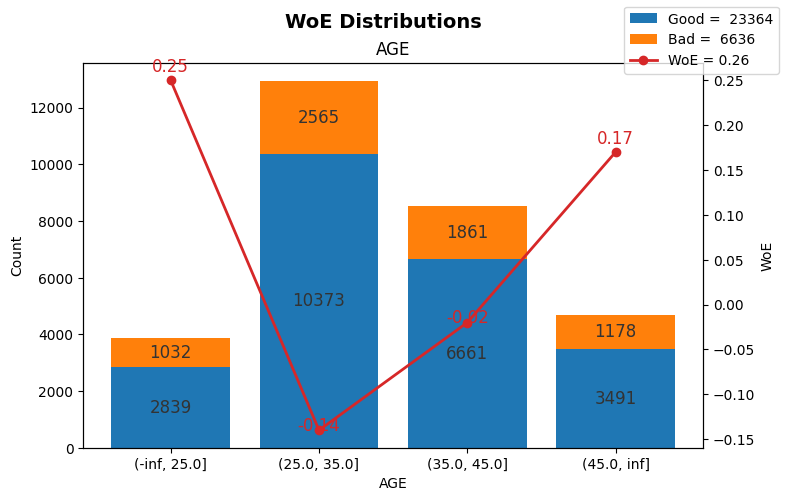

In [29]:
# According to the default parameters, divide the features into boxes, calculate WoE, and display the graphics
plot_woe(data,'AGE')

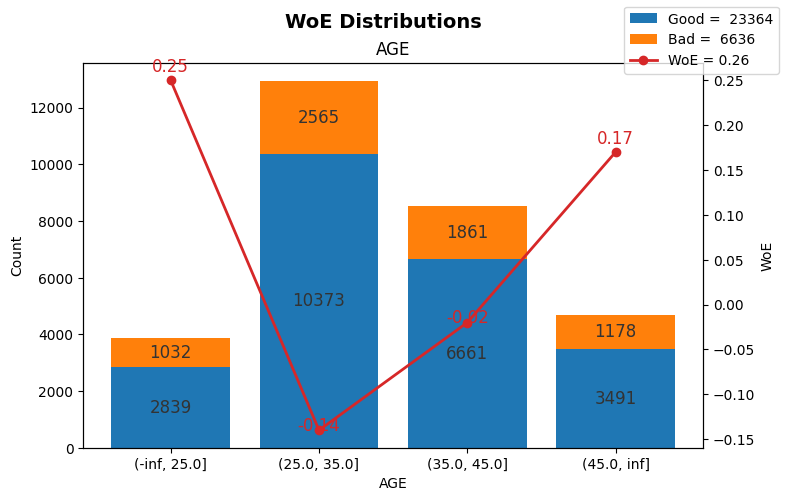

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV
0,AGE,1,"(-inf, 25.0]",3871,1032,2839,12.90%,15.55%,12.15%,26.66%,0.25,0.01,0.02
1,AGE,2,"(25.0, 35.0]",12938,2565,10373,43.13%,38.65%,44.40%,19.83%,-0.14,0.01,0.02
2,AGE,3,"(35.0, 45.0]",8522,1861,6661,28.41%,28.04%,28.51%,21.84%,-0.02,0.00,0.02
3,AGE,4,"(45.0, inf]",4669,1178,3491,15.56%,17.75%,14.94%,25.23%,0.17,0.00,0.02


In [30]:
# According to the default parameters, divide the feature into boxes, calculate WoE, and display graphics and data
plot_woe(data,'AGE',return_data =True)

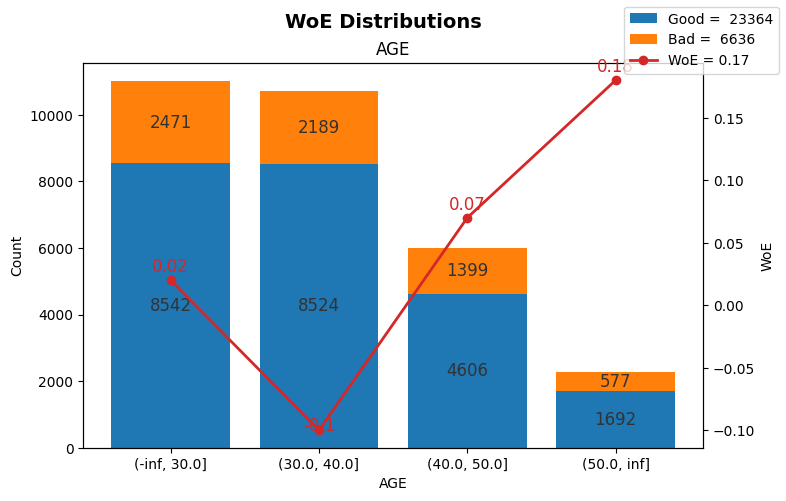

In [31]:
# Calculate WoE according to the specified dividing point and display the graph
plot_woe(data,'AGE',bins=[-inf,30,40,50,inf])

In [32]:
get_woe_iv(data,'AGE',bins=[-inf,30,40,50,inf])

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV
0,AGE,1,"(-inf, 30.0]",11013,2471,8542,36.71%,37.24%,36.56%,22.44%,0.02,0.0,0.01
1,AGE,2,"(30.0, 40.0]",10713,2189,8524,35.71%,32.99%,36.48%,20.43%,-0.10,0.0,0.01
2,AGE,3,"(40.0, 50.0]",6005,1399,4606,20.02%,21.08%,19.71%,23.30%,0.07,0.0,0.01
3,AGE,4,"(50.0, inf]",2269,577,1692,7.56%,8.69%,7.24%,25.43%,0.18,0.0,0.01


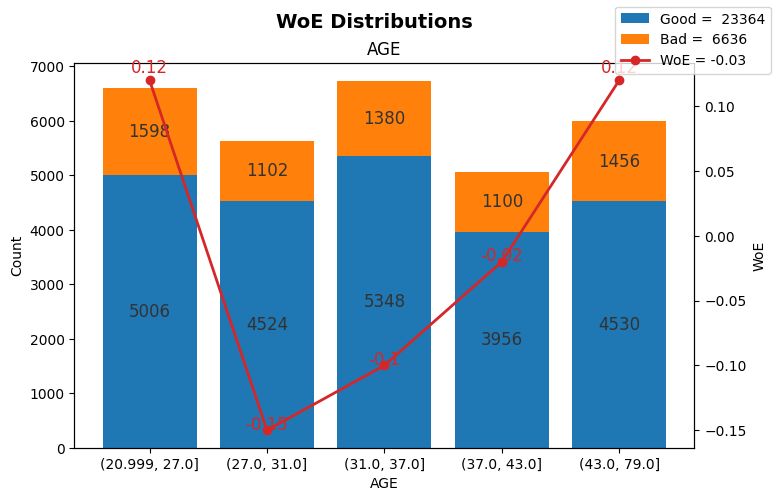

In [33]:
# According to the equal frequency sub-box, divide the feature into five boxes, calculate WoE, and display the graph
plot_woe(data,'AGE',qcut=5)

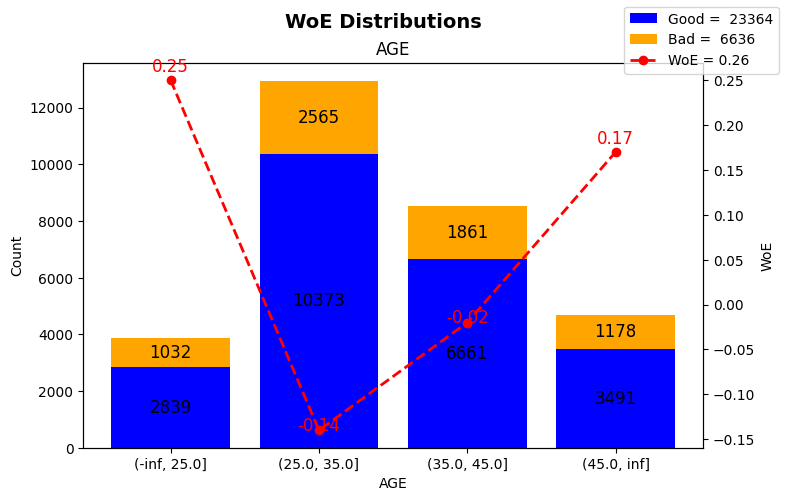

In [34]:
# Divide boxes according to the default decision tree method, calculate WoE, set the color and style of graphics, and display graphics
plot_woe(data,'AGE',color=['blue','orange','red','black'],linewidth=2,linestyle='--')

## Calculate IV and draw

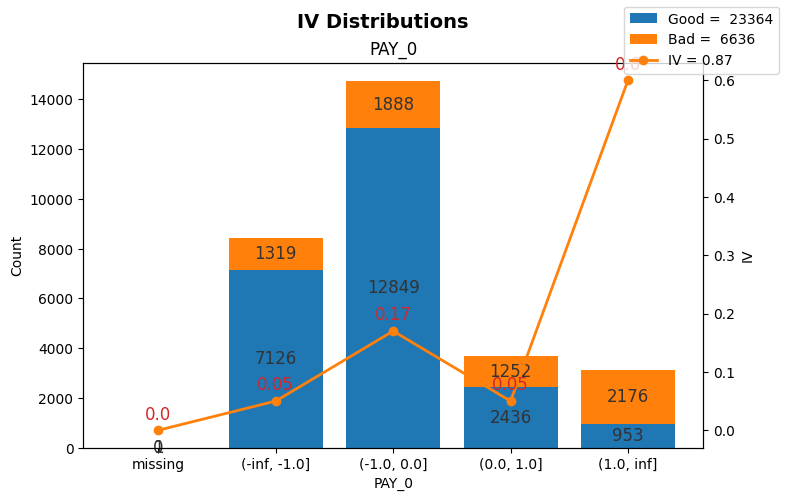

In [35]:
# Divide boxes according to the default decision tree method, calculate IV, and display graphics
plot_iv(data,'PAY_0')

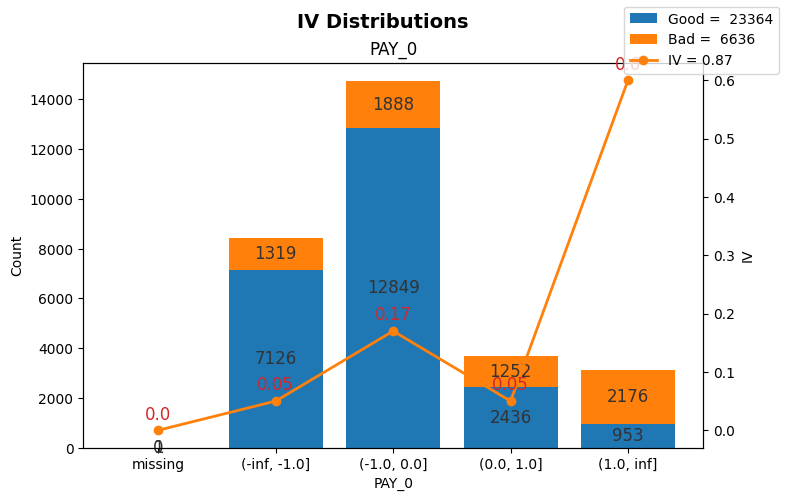

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV
0,PAY_0,1,missing,1,1,0,0.00%,0.02%,0.00%,100.00%,0.00,0.00,0.87
1,PAY_0,2,"(-inf, -1.0]",8445,1319,7126,28.15%,19.88%,30.50%,15.62%,-0.43,0.05,0.87
2,PAY_0,3,"(-1.0, 0.0]",14737,1888,12849,49.12%,28.45%,54.99%,12.81%,-0.66,0.17,0.87
3,PAY_0,4,"(0.0, 1.0]",3688,1252,2436,12.29%,18.87%,10.43%,33.95%,0.59,0.05,0.87
4,PAY_0,5,"(1.0, inf]",3129,2176,953,10.43%,32.79%,4.08%,69.54%,2.08,0.60,0.87


In [36]:
# Divide boxes according to the default decision tree method, calculate IV, and display graphics and data
plot_iv(data,'PAY_0',return_data=True)

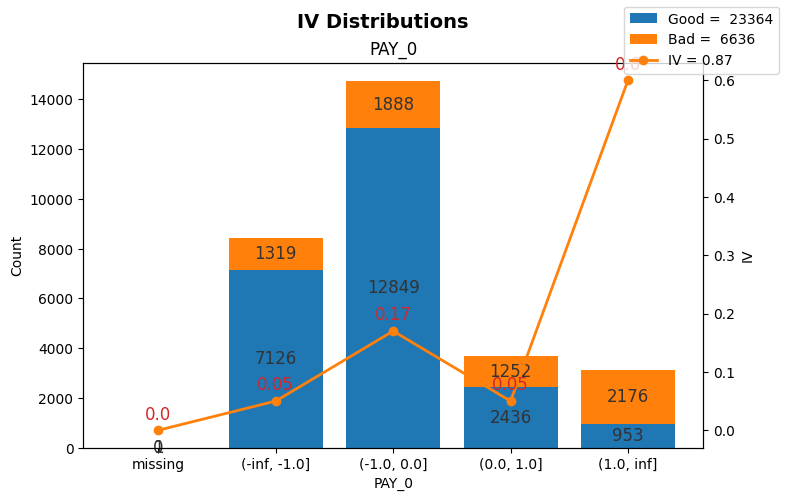

In [37]:
# Divide the boxes according to the decision tree method, calculate IV, and display graphics
plot_iv(data,'PAY_0',method='tree')

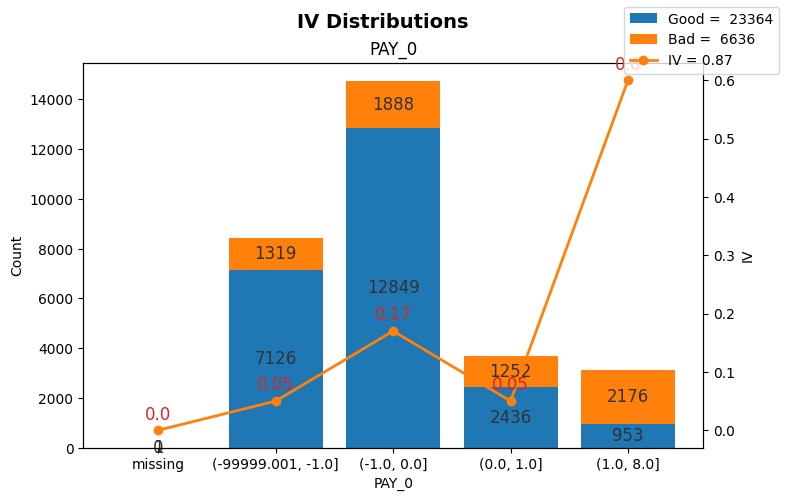

In [38]:
# According to the equal frequency sub-box, divide the feature into five boxes, calculate IV, and display the figure
plot_iv(data,'PAY_0',qcut=5)

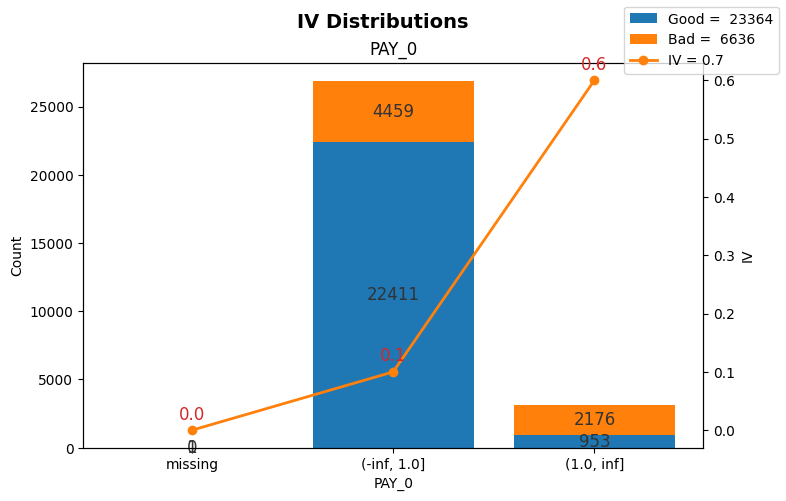

In [39]:
# According to the specified dividing point, divide the feature into boxes, calculate IV, and display the figure
plot_iv(data,'PAY_0',bins=[-inf,1,inf])

### Get the data type of the column, discrete and continuous

In [40]:
col_types = get_col_type(data)
col_types

,Name,Type
0,ID,continuous
1,LIMIT_BAL,continuous
2,SEX,continuous
3,EDUCATION,continuous
4,MARRIAGE,continuous
5,AGE,continuous
6,PAY_0,continuous
7,PAY_2,continuous
8,PAY_3,continuous
9,PAY_4,continuous


## Decision-tree splitting

In [41]:
# According to the decision tree method, obtain the result of feature segmentation points
get_tree_bins(data, 'AGE', max_leaf_nodes=4,min_samples_leaf=0.05)

[-inf, 25.0, 35.0, 45.0, inf]

## Batch decision tree splitting

In [42]:
data_bins = get_data_bins(data,max_leaf_nodes=4)
data_bins

,Name,Bins
0,ID,"[-inf, 15947.0, 18455.0, 26441.0, inf]"
1,LIMIT_BAL,"[-inf, 40000.0, 140000.0, 360000.0, inf]"
2,SEX,"[-inf, 1.0, inf]"
3,EDUCATION,"[-inf, 1.0, 2.0, inf]"
4,MARRIAGE,"[-inf, 1.0, inf]"
5,AGE,"[-inf, 25.0, 35.0, 45.0, inf]"
6,PAY_0,"[-inf, -1.0, 0.0, 1.0, inf]"
7,PAY_2,"[-inf, -2.0, -1.0, 1.0, inf]"
8,PAY_3,"[-inf, -2.0, -1.0, 1.0, inf]"
9,PAY_4,"[-inf, -2.0, -1.0, 0.0, inf]"


## Manually adjust the distribution box

In [43]:
data_bins_adjust = set_update_bins(data_bins,
[
['AGE',[-inf,20,30,40,50,inf]],
['BILL_AMT1',[-inf,1000,8000,50000,inf]],
])
data_bins_adjust

,Name,Bins
0,ID,"[-inf, 15947.0, 18455.0, 26441.0, inf]"
1,LIMIT_BAL,"[-inf, 40000.0, 140000.0, 360000.0, inf]"
2,SEX,"[-inf, 1.0, inf]"
3,EDUCATION,"[-inf, 1.0, 2.0, inf]"
4,MARRIAGE,"[-inf, 1.0, inf]"
5,AGE,"[-inf, 20, 30, 40, 50, inf]"
6,PAY_0,"[-inf, -1.0, 0.0, 1.0, inf]"
7,PAY_2,"[-inf, -2.0, -1.0, 1.0, inf]"
8,PAY_3,"[-inf, -2.0, -1.0, 1.0, inf]"
9,PAY_4,"[-inf, -2.0, -1.0, 0.0, inf]"


## Data Discretization

In [44]:
# Divide the boxes according to the decision tree and discretize the data
get_data_discrete(data)

  0%|          | 0/24 [00:00<?, ?it/s]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,y
0,"(-inf, 15947.0]","(-inf, 40000.0]","(1.0, inf]","(1.0, 2.0]","(-inf, 1.0]","(-inf, 25.0]",missing,"(1.0, inf]","(-2.0, -1.0]","(-2.0, -1.0]",...,"(-inf, 787.0]","(-inf, 390.0]","(-inf, 420.0]","(-inf, 21.0]","(90.0, 4979.0]","(-inf, 17.0]","(-inf, 0.0]","(-inf, 0.0]","(-inf, 1.0]",1
1,"(-inf, 15947.0]","(40000.0, 140000.0]","(1.0, inf]","(1.0, 2.0]","(1.0, inf]","(25.0, 35.0]","(-inf, -1.0]","(1.0, inf]","(-1.0, 1.0]","(-1.0, 0.0]",...,"(787.0, 16643.0]","(390.0, 12541.0]","(420.0, 12655.0]","(-inf, 21.0]","(90.0, 4979.0]","(17.0, 4640.0]","(0.0, 1900.0]","(-inf, 0.0]","(1.0, 2000.0]",1
2,"(-inf, 15947.0]","(40000.0, 140000.0]","(1.0, inf]","(1.0, 2.0]","(1.0, inf]","(25.0, 35.0]","(-1.0, 0.0]","(-1.0, 1.0]","(-1.0, 1.0]","(-1.0, 0.0]",...,"(787.0, 16643.0]","(12541.0, 51044.0]","(12655.0, 51106.0]","(21.0, 4550.0]","(90.0, 4979.0]","(17.0, 4640.0]","(0.0, 1900.0]","(0.0, 2000.0]","(2000.0, 9844.0]",0
3,"(-inf, 15947.0]","(40000.0, 140000.0]","(1.0, inf]","(1.0, 2.0]","(-inf, 1.0]","(35.0, 45.0]","(-1.0, 0.0]","(-1.0, 1.0]","(-1.0, 1.0]","(-1.0, 0.0]",...,"(16643.0, 79181.0]","(12541.0, 51044.0]","(12655.0, 51106.0]","(21.0, 4550.0]","(90.0, 4979.0]","(17.0, 4640.0]","(0.0, 1900.0]","(0.0, 2000.0]","(1.0, 2000.0]",0
4,"(-inf, 15947.0]","(40000.0, 140000.0]","(-inf, 1.0]","(1.0, 2.0]","(-inf, 1.0]","(45.0, inf]","(-inf, -1.0]","(-1.0, 1.0]","(-2.0, -1.0]","(-1.0, 0.0]",...,"(16643.0, 79181.0]","(12541.0, 51044.0]","(12655.0, 51106.0]","(21.0, 4550.0]","(15000.0, inf]","(4640.0, 16883.0]","(4327.0, inf]","(0.0, 2000.0]","(1.0, 2000.0]",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,"(26441.0, inf]","(140000.0, 360000.0]","(-inf, 1.0]","(2.0, inf]","(-inf, 1.0]","(35.0, 45.0]","(-1.0, 0.0]","(-1.0, 1.0]","(-1.0, 1.0]","(-1.0, 0.0]",...,"(79181.0, inf]","(12541.0, 51044.0]","(12655.0, 51106.0]","(4550.0, 17580.0]","(15000.0, inf]","(4640.0, 16883.0]","(1900.0, 4327.0]","(2000.0, 9980.0]","(1.0, 2000.0]",0
29996,"(26441.0, inf]","(140000.0, 360000.0]","(-inf, 1.0]","(2.0, inf]","(1.0, inf]","(35.0, 45.0]","(-inf, -1.0]","(-2.0, -1.0]","(-2.0, -1.0]","(-2.0, -1.0]",...,"(787.0, 16643.0]","(390.0, 12541.0]","(-inf, 420.0]","(21.0, 4550.0]","(90.0, 4979.0]","(4640.0, 16883.0]","(0.0, 1900.0]","(-inf, 0.0]","(-inf, 1.0]",0
29997,"(26441.0, inf]","(-inf, 40000.0]","(-inf, 1.0]","(1.0, 2.0]","(1.0, inf]","(35.0, 45.0]","(1.0, inf]","(1.0, inf]","(1.0, inf]","(-2.0, -1.0]",...,"(16643.0, 79181.0]","(12541.0, 51044.0]","(12655.0, 51106.0]","(-inf, 21.0]","(-inf, 90.0]","(16883.0, inf]","(1900.0, 4327.0]","(0.0, 2000.0]","(2000.0, 9844.0]",1
29998,"(26441.0, inf]","(40000.0, 140000.0]","(-inf, 1.0]","(2.0, inf]","(-inf, 1.0]","(35.0, 45.0]","(0.0, 1.0]","(-2.0, -1.0]","(-1.0, 1.0]","(-1.0, 0.0]",...,"(16643.0, 79181.0]","(390.0, 12541.0]","(12655.0, 51106.0]","(17580.0, inf]","(90.0, 4979.0]","(17.0, 4640.0]","(1900.0, 4327.0]","(9980.0, inf]","(1.0, 2000.0]",1


In [45]:
# 按照调整后的分箱结果进行离散化
data_train_discrete = get_data_discrete(data_train,col_bin = data_bins_adjust)
data_train_discrete.head()

  0%|          | 0/24 [00:00<?, ?it/s]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,y
0,"(18455.0, 26441.0]","(40000.0, 140000.0]","(1.0, inf]","(1.0, 2.0]","(-inf, 1.0]","(20.0, 30.0]","(-inf, -1.0]","(-2.0, -1.0]","(-2.0, -1.0]","(-2.0, -1.0]",...,"(79181.0, inf]","(51044.0, inf]","(51106.0, inf]","(21.0, 4550.0]","(90.0, 4979.0]","(16883.0, inf]","(1900.0, 4327.0]","(2000.0, 9980.0]","(2000.0, 9844.0]",0
1,"(-inf, 15947.0]","(140000.0, 360000.0]","(1.0, inf]","(1.0, 2.0]","(1.0, inf]","(20.0, 30.0]","(-inf, -1.0]","(-inf, -2.0]","(-inf, -2.0]","(-inf, -2.0]",...,"(79181.0, inf]","(390.0, 12541.0]","(420.0, 12655.0]","(21.0, 4550.0]","(90.0, 4979.0]","(16883.0, inf]","(4327.0, inf]","(2000.0, 9980.0]","(2000.0, 9844.0]",0
2,"(-inf, 15947.0]","(40000.0, 140000.0]","(1.0, inf]","(-inf, 1.0]","(1.0, inf]","(20.0, 30.0]","(-1.0, 0.0]","(-1.0, 1.0]","(-1.0, 1.0]","(-1.0, 0.0]",...,"(16643.0, 79181.0]","(12541.0, 51044.0]","(12655.0, 51106.0]","(21.0, 4550.0]","(90.0, 4979.0]","(17.0, 4640.0]","(0.0, 1900.0]","(2000.0, 9980.0]","(2000.0, 9844.0]",0
3,"(26441.0, inf]","(-inf, 40000.0]","(-inf, 1.0]","(2.0, inf]","(1.0, inf]","(20.0, 30.0]","(-1.0, 0.0]","(-1.0, 1.0]","(-1.0, 1.0]","(-1.0, 0.0]",...,"(16643.0, 79181.0]","(12541.0, 51044.0]","(12655.0, 51106.0]","(21.0, 4550.0]","(90.0, 4979.0]","(17.0, 4640.0]","(-inf, 0.0]","(0.0, 2000.0]","(-inf, 1.0]",0
4,"(18455.0, 26441.0]","(40000.0, 140000.0]","(1.0, inf]","(1.0, 2.0]","(-inf, 1.0]","(30.0, 40.0]","(-1.0, 0.0]","(-1.0, 1.0]","(-1.0, 1.0]","(-1.0, 0.0]",...,"(16643.0, 79181.0]","(51044.0, inf]","(12655.0, 51106.0]","(21.0, 4550.0]","(90.0, 4979.0]","(17.0, 4640.0]","(1900.0, 4327.0]","(0.0, 2000.0]","(1.0, 2000.0]",0


## WOE conversion

In [46]:
# Use the discretized data to perform WoE conversion in batches
data_train_woe = get_woe_transform(data_train_discrete)
data_train_woe.head()

  0%|          | 0/24 [00:00<?, ?it/s]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,y
0,-0.17,0.15,-0.07,0.09,0.07,0.01,-0.42,-0.38,-0.43,-0.38,...,-0.12,-0.13,-0.11,-0.02,0.0,-0.88,-0.16,-0.22,-0.25,0
1,0.02,-0.35,-0.07,0.09,-0.06,0.01,-0.42,-0.23,-0.21,-0.16,...,-0.12,-0.15,-0.17,-0.02,0.0,-0.88,-0.47,-0.22,-0.25,0
2,0.02,0.15,-0.07,-0.18,-0.06,0.01,-0.65,-0.40,-0.30,-0.24,...,0.10,0.15,0.15,-0.02,0.0,-0.02,0.06,-0.22,-0.25,0
3,0.06,0.69,0.10,0.07,-0.06,0.01,-0.65,-0.40,-0.30,-0.24,...,0.10,0.15,0.15,-0.02,0.0,-0.02,0.46,0.06,0.37,0
4,-0.17,0.15,-0.07,0.09,0.07,-0.10,-0.65,-0.40,-0.30,-0.24,...,0.10,-0.13,0.15,-0.02,0.0,-0.02,-0.16,0.06,0.08,0


In [47]:
## Specify method='discrete 'to calculate WoE and IV using the discretized column
get_woe_iv(data_train_discrete, 'AGE',method='discrete')

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV
0,AGE,1,"(20.0, 30.0]",8289,1832,6457,36.84%,37.12%,36.76%,22.10%,0.01,0.0,0.01
1,AGE,2,"(30.0, 40.0]",7990,1626,6364,35.51%,32.94%,36.23%,20.35%,-0.10,0.0,0.01
2,AGE,3,"(40.0, 50.0]",4514,1053,3461,20.06%,21.33%,19.71%,23.33%,0.08,0.0,0.01
3,AGE,4,"(50.0, inf]",1707,425,1282,7.59%,8.61%,7.30%,24.90%,0.17,0.0,0.01


## Batch calculate IV of all features

In [48]:
# Use the default decision tree box splitting method to batch calculate the IV of all variables in the dataset
data_iv = get_data_iv(data_train)  
data_iv

  0%|          | 0/24 [00:00<?, ?it/s]

,Name,IV
6,PAY_0,0.86
7,PAY_2,0.53
8,PAY_3,0.41
9,PAY_4,0.35
10,PAY_5,0.32
11,PAY_6,0.28
18,PAY_AMT1,0.18
19,PAY_AMT2,0.16
1,LIMIT_BAL,0.16
20,PAY_AMT3,0.12


## Calculate IV in batches based on discrete data

In [49]:
# Calculate IV in batches based on discrete data
data_iv = get_data_iv(data_train_discrete,method='discrete')  
data_iv

  0%|          | 0/24 [00:00<?, ?it/s]

,Name,IV
6,PAY_0,0.86
7,PAY_2,0.53
8,PAY_3,0.41
9,PAY_4,0.35
10,PAY_5,0.32
11,PAY_6,0.28
18,PAY_AMT1,0.18
1,LIMIT_BAL,0.17
19,PAY_AMT2,0.16
20,PAY_AMT3,0.12


## Filter features through minimum IV>=0.02 and maximum correlation<=0.6

In [50]:
# Filter features through minimum IV>=0.02 and maximum correlation<=0.6
# Only return the features that need to be retained
get_feature_by_ivcorr(data_train,col_iv=data_iv,keep=[],drop=[],min_iv = 0.02,max_corr=0.5,return_drop=False)

['LIMIT_BAL',
 'PAY_0',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [51]:
# Filter features through minimum IV>=0.02 and maximum correlation<=0.6
# Return the features retained after filtering, features deleted according to IV, features deleted according to corr, and correlation matrix
col_keep,col_drop_by_iv,col_drop_by_corr,iv_corr_result = get_feature_by_ivcorr(data_train,col_iv=data_iv,keep=[],drop=[],min_iv = 0.02,max_corr=0.5,target='target',return_drop=True)
col_keep

['LIMIT_BAL',
 'PAY_0',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [52]:
# Features deleted according to IV
col_drop_by_iv

array(['BILL_AMT5', 'BILL_AMT6', 'ID', 'EDUCATION', 'BILL_AMT4',
       'BILL_AMT3', 'BILL_AMT2', 'AGE', 'SEX', 'BILL_AMT1', 'MARRIAGE'],
      dtype=object)

In [53]:
# Features deleted according to corr
col_drop_by_corr

array(['PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT4',
       'BILL_AMT3', 'BILL_AMT2', 'BILL_AMT1'], dtype=object)

In [54]:
# IV and correlation matrix
iv_corr_result.head()

,Name1,Name2,IV1,IV2,IV1-IV2,Corr
1,PAY_0,PAY_2,0.86,0.53,0.33,0.67
2,PAY_0,PAY_3,0.86,0.41,0.45,0.58
3,PAY_0,PAY_4,0.86,0.35,0.51,0.54
4,PAY_0,PAY_5,0.86,0.32,0.54,0.51
5,PAY_0,PAY_6,0.86,0.28,0.58,0.47


## View feature correlation graph

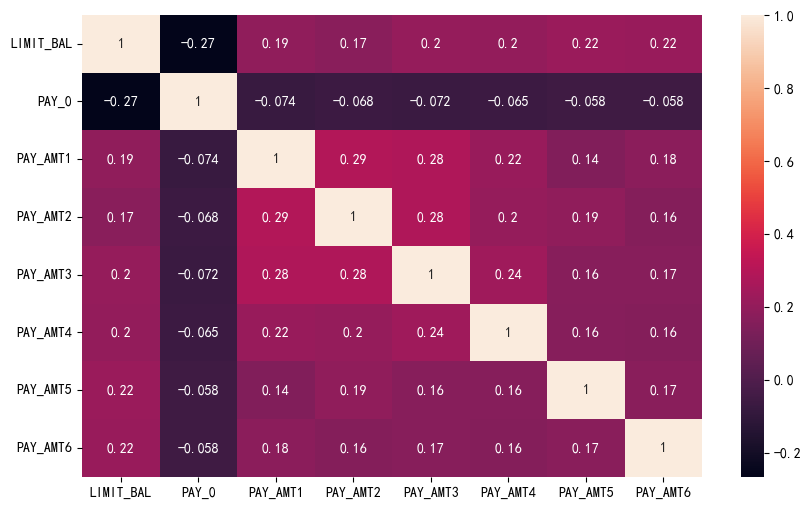

In [55]:
plot_corr(data_train[col_keep])

In [56]:
# Batch calculation of WoE, using the default decision tree box splitting method
get_data_woe(data)  

  0%|          | 0/24 [00:00<?, ?it/s]

,Name,WoE
6,PAY_0,1.58
10,PAY_5,0.74
11,PAY_6,0.69
9,PAY_4,0.57
7,PAY_2,0.45
8,PAY_3,0.40
5,AGE,0.26
0,ID,0.20
12,BILL_AMT1,0.04
2,SEX,0.04


In [57]:
# Batch calculation IV, equal frequency sub-box, divided into 5 boxes
get_data_iv(data,qcut=5)  

  0%|          | 0/24 [00:00<?, ?it/s]

,Name,IV
6,PAY_0,0.87
7,PAY_2,0.54
8,PAY_3,0.41
9,PAY_4,0.36
10,PAY_5,0.33
11,PAY_6,0.28
1,LIMIT_BAL,0.16
18,PAY_AMT1,0.15
19,PAY_AMT2,0.14
20,PAY_AMT3,0.12


## Get the IV list of model variables

In [58]:
# Get the IV list of model variables
get_model_iv(data_train_discrete[col_keep+['y']],data_iv,col_bins=data_bins_adjust,col_dict=col_dict,col_types=col_types)  

  0%|          | 0/9 [00:00<?, ?it/s]

,No.,Name,Label,Type,Bins No.,Bin,Bins,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV,WoE.,Style
0,1,PAY_0,Payment amount,continuous,1,missing,"[-inf, -1.0, 0.0, 1.0, inf]",0,0,0,0.00%,0.00%,0.00%,0.00%,0.00,0.00,0.86,0.00,0
1,1,PAY_0,Payment amount,continuous,2,"(-inf, -1.0]","[-inf, -1.0, 0.0, 1.0, inf]",6288,977,5311,27.95%,19.79%,30.24%,15.54%,-0.42,0.04,0.86,-0.42,0
2,1,PAY_0,Payment amount,continuous,3,"(-1.0, 0.0]","[-inf, -1.0, 0.0, 1.0, inf]",11109,1417,9692,49.37%,28.71%,55.18%,12.76%,-0.65,0.17,0.86,-0.65,0
3,1,PAY_0,Payment amount,continuous,4,"(0.0, 1.0]","[-inf, -1.0, 0.0, 1.0, inf]",2767,921,1846,12.30%,18.66%,10.51%,33.29%,0.57,0.05,0.86,0.57,0
4,1,PAY_0,Payment amount,continuous,5,"(1.0, inf]","[-inf, -1.0, 0.0, 1.0, inf]",2336,1621,715,10.38%,32.84%,4.07%,69.39%,2.09,0.60,0.86,2.09,0
5,2,PAY_AMT1,,continuous,1,missing,"[-inf, 21.0, 4550.0, 17580.0, inf]",0,0,0,0.00%,0.00%,0.00%,0.00%,0.00,0.00,0.18,0.00,1
6,2,PAY_AMT1,,continuous,2,"(-inf, 21.0]","[-inf, 21.0, 4550.0, 17580.0, inf]",4055,1438,2617,18.02%,29.13%,14.90%,35.46%,0.67,0.10,0.18,0.67,1
7,2,PAY_AMT1,,continuous,3,"(21.0, 4550.0]","[-inf, 21.0, 4550.0, 17580.0, inf]",11940,2585,9355,53.07%,52.37%,53.26%,21.65%,-0.02,0.00,0.18,-0.02,1
8,2,PAY_AMT1,,continuous,4,"(4550.0, 17580.0]","[-inf, 21.0, 4550.0, 17580.0, inf]",5310,798,4512,23.60%,16.17%,25.69%,15.03%,-0.46,0.04,0.18,-0.46,1
9,2,PAY_AMT1,,continuous,5,"(17580.0, inf]","[-inf, 21.0, 4550.0, 17580.0, inf]",1195,115,1080,5.31%,2.33%,6.15%,9.62%,-0.97,0.04,0.18,-0.97,1


## Scorecard development

In [59]:
# Develop scoring cards according to default parameters
get_scorecard(data_train[col_keep + ['y']] ,data_bins_adjust)

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

,No.,Name,Label,Type,Bins No.,Bin,Bins,#Total,#Bad,#Good,...,%BadRate,WoE,IV,Total IV,WoE.,Style,Intercept,Coef,Base Score,Score
0,1,PAY_0,,continuous,1,missing,"[-inf, -1.0, 0.0, 1.0, inf]",0,0,0,...,0.00%,0.00,0.00,0.86,0.00,0,-1.27,0.91,600,-0.0
1,1,PAY_0,,continuous,2,"(-inf, -1.0]","[-inf, -1.0, 0.0, 1.0, inf]",6288,977,5311,...,15.54%,-0.42,0.04,0.86,-0.42,0,-1.27,0.91,600,28.0
2,1,PAY_0,,continuous,3,"(-1.0, 0.0]","[-inf, -1.0, 0.0, 1.0, inf]",11109,1417,9692,...,12.76%,-0.65,0.17,0.86,-0.65,0,-1.27,0.91,600,43.0
3,1,PAY_0,,continuous,4,"(0.0, 1.0]","[-inf, -1.0, 0.0, 1.0, inf]",2767,921,1846,...,33.29%,0.57,0.05,0.86,0.57,0,-1.27,0.91,600,-37.0
4,1,PAY_0,,continuous,5,"(1.0, inf]","[-inf, -1.0, 0.0, 1.0, inf]",2336,1621,715,...,69.39%,2.09,0.60,0.86,2.09,0,-1.27,0.91,600,-137.0
5,2,PAY_AMT1,,continuous,1,missing,"[-inf, 21.0, 4550.0, 17580.0, inf]",0,0,0,...,0.00%,0.00,0.00,0.18,0.00,1,-1.27,0.14,600,-0.0
6,2,PAY_AMT1,,continuous,2,"(-inf, 21.0]","[-inf, 21.0, 4550.0, 17580.0, inf]",4055,1438,2617,...,35.46%,0.67,0.10,0.18,0.67,1,-1.27,0.14,600,-7.0
7,2,PAY_AMT1,,continuous,3,"(21.0, 4550.0]","[-inf, 21.0, 4550.0, 17580.0, inf]",11940,2585,9355,...,21.65%,-0.02,0.00,0.18,-0.02,1,-1.27,0.14,600,0.0
8,2,PAY_AMT1,,continuous,4,"(4550.0, 17580.0]","[-inf, 21.0, 4550.0, 17580.0, inf]",5310,798,4512,...,15.03%,-0.46,0.04,0.18,-0.46,1,-1.27,0.14,600,5.0
9,2,PAY_AMT1,,continuous,5,"(17580.0, inf]","[-inf, 21.0, 4550.0, 17580.0, inf]",1195,115,1080,...,9.62%,-0.97,0.04,0.18,-0.97,1,-1.27,0.14,600,10.0


In [60]:
# Set the data precision and return the details of the logical regression model
scorecard,lr,a,b = get_scorecard(data_train[col_keep + ['y']] ,data_bins_adjust,precision=4,return_lr=True)
scorecard

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

,No.,Name,Label,Type,Bins No.,Bin,Bins,#Total,#Bad,#Good,...,%BadRate,WoE,IV,Total IV,WoE.,Style,Intercept,Coef,Base Score,Score
0,1,PAY_0,,continuous,1,missing,"[-inf, -1.0, 0.0, 1.0, inf]",0,0,0,...,0.0000%,0.0000,0.0000,0.8647,0.0000,0,-1.2731,0.9110,600,-0.0
1,1,PAY_0,,continuous,2,"(-inf, -1.0]","[-inf, -1.0, 0.0, 1.0, inf]",6288,977,5311,...,15.5375%,-0.4238,0.0443,0.8647,-0.4238,0,-1.2731,0.9110,600,28.0
2,1,PAY_0,,continuous,3,"(-1.0, 0.0]","[-inf, -1.0, 0.0, 1.0, inf]",11109,1417,9692,...,12.7554%,-0.6535,0.1730,0.8647,-0.6535,0,-1.2731,0.9110,600,43.0
3,1,PAY_0,,continuous,4,"(0.0, 1.0]","[-inf, -1.0, 0.0, 1.0, inf]",2767,921,1846,...,33.2851%,0.5740,0.0468,0.8647,0.5740,0,-1.2731,0.9110,600,-38.0
4,1,PAY_0,,continuous,5,"(1.0, inf]","[-inf, -1.0, 0.0, 1.0, inf]",2336,1621,715,...,69.3921%,2.0878,0.6007,0.8647,2.0878,0,-1.2731,0.9110,600,-137.0
5,2,PAY_AMT1,,continuous,1,missing,"[-inf, 21.0, 4550.0, 17580.0, inf]",0,0,0,...,0.0000%,0.0000,0.0000,0.1767,0.0000,1,-1.2731,0.1443,600,-0.0
6,2,PAY_AMT1,,continuous,2,"(-inf, 21.0]","[-inf, 21.0, 4550.0, 17580.0, inf]",4055,1438,2617,...,35.4624%,0.6705,0.0954,0.1767,0.6705,1,-1.2731,0.1443,600,-7.0
7,2,PAY_AMT1,,continuous,3,"(21.0, 4550.0]","[-inf, 21.0, 4550.0, 17580.0, inf]",11940,2585,9355,...,21.6499%,-0.0169,0.0002,0.1767,-0.0169,1,-1.2731,0.1443,600,0.0
8,2,PAY_AMT1,,continuous,4,"(4550.0, 17580.0]","[-inf, 21.0, 4550.0, 17580.0, inf]",5310,798,4512,...,15.0282%,-0.4631,0.0441,0.1767,-0.4631,1,-1.2731,0.1443,600,5.0
9,2,PAY_AMT1,,continuous,5,"(17580.0, inf]","[-inf, 21.0, 4550.0, 17580.0, inf]",1195,115,1080,...,9.6234%,-0.9705,0.0371,0.1767,-0.9705,1,-1.2731,0.1443,600,10.0


In [61]:
# View the details of the logical regression model
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                22500
Model:                          Logit   Df Residuals:                    22491
Method:                           MLE   Df Model:                            8
Date:                Tue, 09 May 2023   Pseudo R-squ.:                  0.1615
Time:                        17:37:29   Log-Likelihood:                -9925.5
converged:                       True   LL-Null:                       -11838.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2731      0.018    -70.247      0.000      -1.309      -1.238
LIMIT_BAL      0.5425      0.045     11.958      0.000       0.454       0.631
PAY_0          0.9110      0.019     48.360      0.000       0.874       0.948
PAY_AMT1       0.1443      0.050      2.912      0.004       0.047       0.241
PAY_AMT2       0.2597      0.053      4.855      0.000       0.155       0.364
PAY_AMT3       0.2203      0.062      3.542      0.000       0.098       0.342
PAY_AMT4       0.1442      0.071      2.035      0.042       0.005       0.283
PAY_AMT5       0.1869      0.073      2.546      0.011       0.043       0.331
PAY_AMT6       0.0598      0.074      0.807      0.420      -0.085       0.205
==============================================================================
"""

## Check VIF

In [62]:
get_vif(data_train_woe,data_train_woe.columns,return_data=True)

(2.97,
     variables   VIF
 0          ID  1.02
 1   LIMIT_BAL  1.48
 2         SEX  1.02
 3   EDUCATION  1.12
 4    MARRIAGE  1.06
 5         AGE  1.03
 6       PAY_0  1.95
 7       PAY_2  2.91
 8       PAY_3  2.73
 9       PAY_4  2.78
 10      PAY_5  2.97
 11      PAY_6  2.17
 12  BILL_AMT1  1.94
 13  BILL_AMT2  1.90
 14  BILL_AMT3  2.10
 15  BILL_AMT4  1.56
 16  BILL_AMT5  2.30
 17  BILL_AMT6  1.93
 18   PAY_AMT1  1.90
 19   PAY_AMT2  1.89
 20   PAY_AMT3  1.91
 21   PAY_AMT4  2.07
 22   PAY_AMT5  1.82
 23   PAY_AMT6  1.68)

In [63]:
# View the parameters of the scorecard model
print('a:',a,'','b:',b)

a: 508.4396430011438  b: 72.13475204444818


## Predict model score

In [64]:
#  Predict training set model score
data_train_score = get_predict_score(data_train,scorecard)
data_train_score

  0%|          | 0/8 [00:00<?, ?it/s]

,PAY_0,PAY_0_Score,PAY_AMT1,PAY_AMT1_Score,LIMIT_BAL,LIMIT_BAL_Score,PAY_AMT2,PAY_AMT2_Score,PAY_AMT3,PAY_AMT3_Score,PAY_AMT4,PAY_AMT4_Score,PAY_AMT5,PAY_AMT5_Score,PAY_AMT6,PAY_AMT6_Score,y,Score,Proba
0,-1,28.0,1671.0,0.0,120000.0,-6.0,380.0,-0.0,131062.0,14.0,2000.0,2.0,3000.0,3.0,3000.0,1.0,0,642.0,0.14
1,-2,28.0,1468.0,0.0,200000.0,14.0,2321.0,-0.0,163597.0,14.0,6680.0,5.0,3963.0,3.0,2514.0,1.0,0,665.0,0.10
2,0,43.0,4038.0,0.0,80000.0,-6.0,3199.0,-0.0,914.0,0.0,850.0,-1.0,2055.0,3.0,8318.0,1.0,0,640.0,0.14
3,0,43.0,1596.0,0.0,20000.0,-27.0,2000.0,-0.0,3000.0,0.0,0.0,-5.0,1600.0,-1.0,0.0,-2.0,0,608.0,0.20
4,0,43.0,3000.0,0.0,90000.0,-6.0,2000.0,-0.0,2000.0,0.0,2000.0,2.0,2000.0,-1.0,1087.0,-0.0,0,638.0,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22495,2,-137.0,3000.0,0.0,50000.0,-6.0,2525.0,-0.0,3900.0,0.0,0.0,-5.0,2000.0,-1.0,4500.0,1.0,1,452.0,0.69
22496,-1,28.0,0.0,-7.0,210000.0,14.0,358.0,-0.0,12816.0,7.0,0.0,-5.0,102.0,-1.0,210.0,-0.0,0,636.0,0.15
22497,1,-38.0,0.0,-7.0,390000.0,28.0,1266.0,-0.0,0.0,-8.0,0.0,-5.0,0.0,-5.0,0.0,-2.0,0,563.0,0.32
22498,0,43.0,1700.0,0.0,30000.0,-27.0,1600.0,-0.0,1287.0,0.0,1296.0,-1.0,500.0,-1.0,1550.0,-0.0,0,614.0,0.19


In [65]:
# Predict test set model score
data_test_score = get_predict_score(data_test,scorecard)
data_test_score

  0%|          | 0/8 [00:00<?, ?it/s]

,PAY_0,PAY_0_Score,PAY_AMT1,PAY_AMT1_Score,LIMIT_BAL,LIMIT_BAL_Score,PAY_AMT2,PAY_AMT2_Score,PAY_AMT3,PAY_AMT3_Score,PAY_AMT4,PAY_AMT4_Score,PAY_AMT5,PAY_AMT5_Score,PAY_AMT6,PAY_AMT6_Score,y,Score,Proba
0,-2,28.0,0.0,-7.0,400000.0,28.0,0.0,-11.0,0.0,-8.0,0.0,-5.0,0.0,-5.0,0.0,-2.0,0,621.0,0.18
1,0,43.0,2600.0,0.0,80000.0,-6.0,4300.0,-0.0,2000.0,0.0,2000.0,2.0,2000.0,-1.0,2000.0,-0.0,0,641.0,0.14
2,1,-38.0,0.0,-7.0,200000.0,14.0,2317.0,-0.0,7588.0,7.0,7614.0,5.0,14053.0,9.0,0.0,-2.0,0,591.0,0.25
3,-1,28.0,1087.0,0.0,20000.0,-27.0,1140.0,-0.0,0.0,-8.0,7014.0,5.0,800.0,-1.0,0.0,-2.0,0,598.0,0.23
4,2,-137.0,5000.0,5.0,70000.0,-6.0,3000.0,-0.0,2000.0,0.0,3000.0,2.0,5000.0,3.0,0.0,-2.0,0,468.0,0.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,0,43.0,1128.0,0.0,500000.0,28.0,1000.0,-0.0,0.0,-8.0,8479.0,5.0,236.0,-1.0,2990.0,1.0,0,671.0,0.10
7496,0,43.0,8080.0,5.0,110000.0,-6.0,14298.0,8.0,2519.0,0.0,6616.0,5.0,1953.0,-1.0,5300.0,1.0,0,658.0,0.12
7497,0,43.0,4539.0,0.0,150000.0,14.0,4218.0,-0.0,4204.0,0.0,3296.0,2.0,3408.0,3.0,3416.0,1.0,0,666.0,0.10
7498,0,43.0,5059.0,5.0,140000.0,-6.0,14659.0,8.0,5000.0,7.0,8000.0,5.0,5000.0,3.0,10000.0,3.0,0,671.0,0.10


## Calculate AUC and KS

  0%|          | 0/8 [00:00<?, ?it/s]

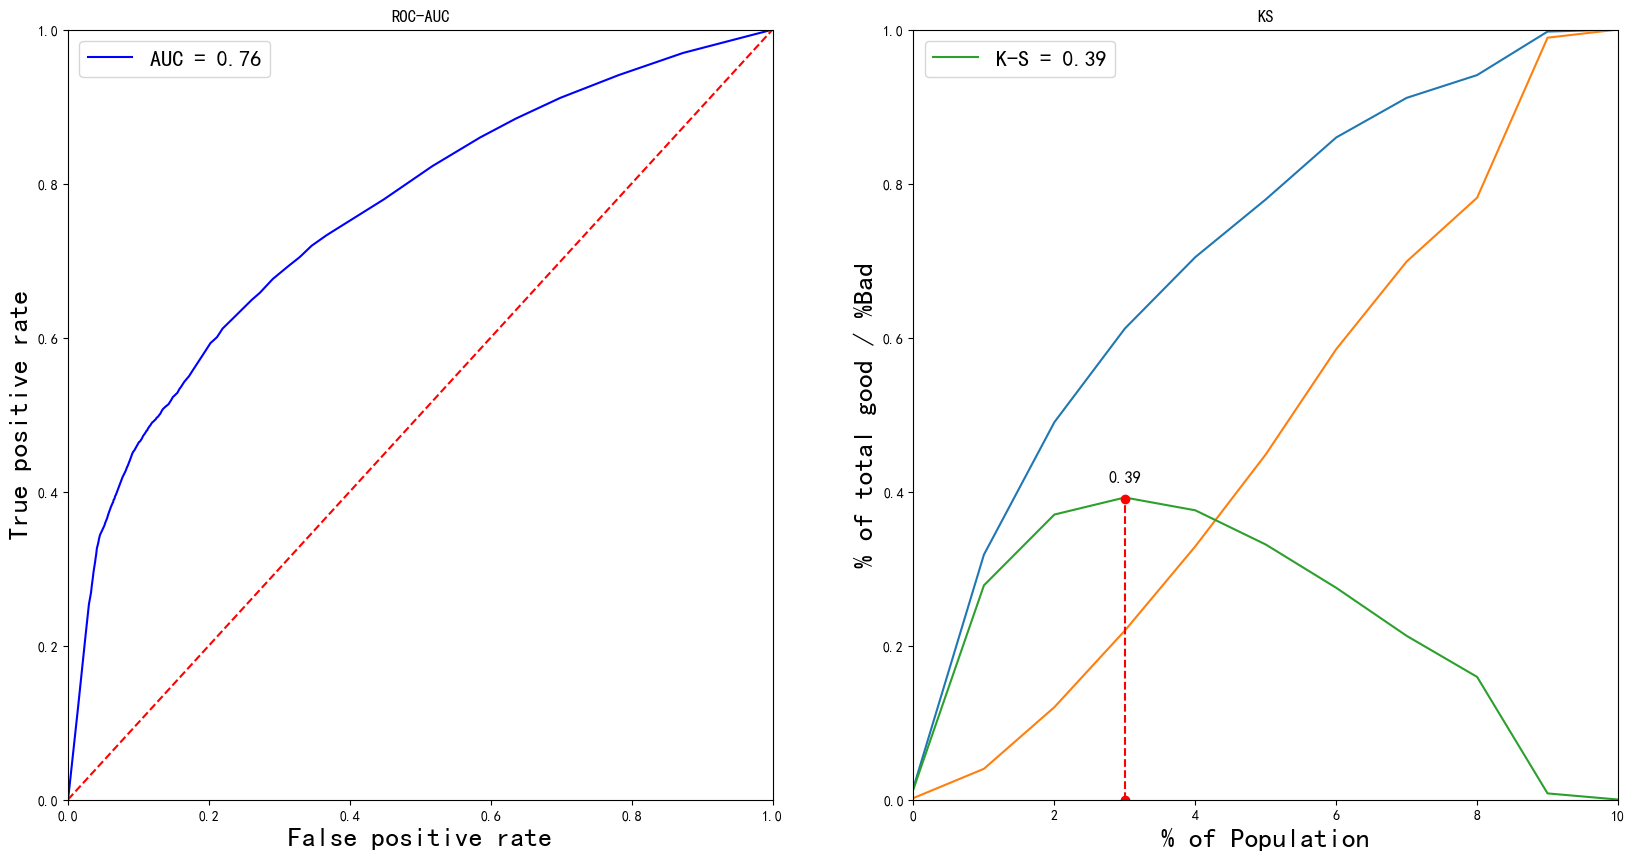

In [66]:
plot_roc_ks(data_train,scorecard)

  0%|          | 0/8 [00:00<?, ?it/s]

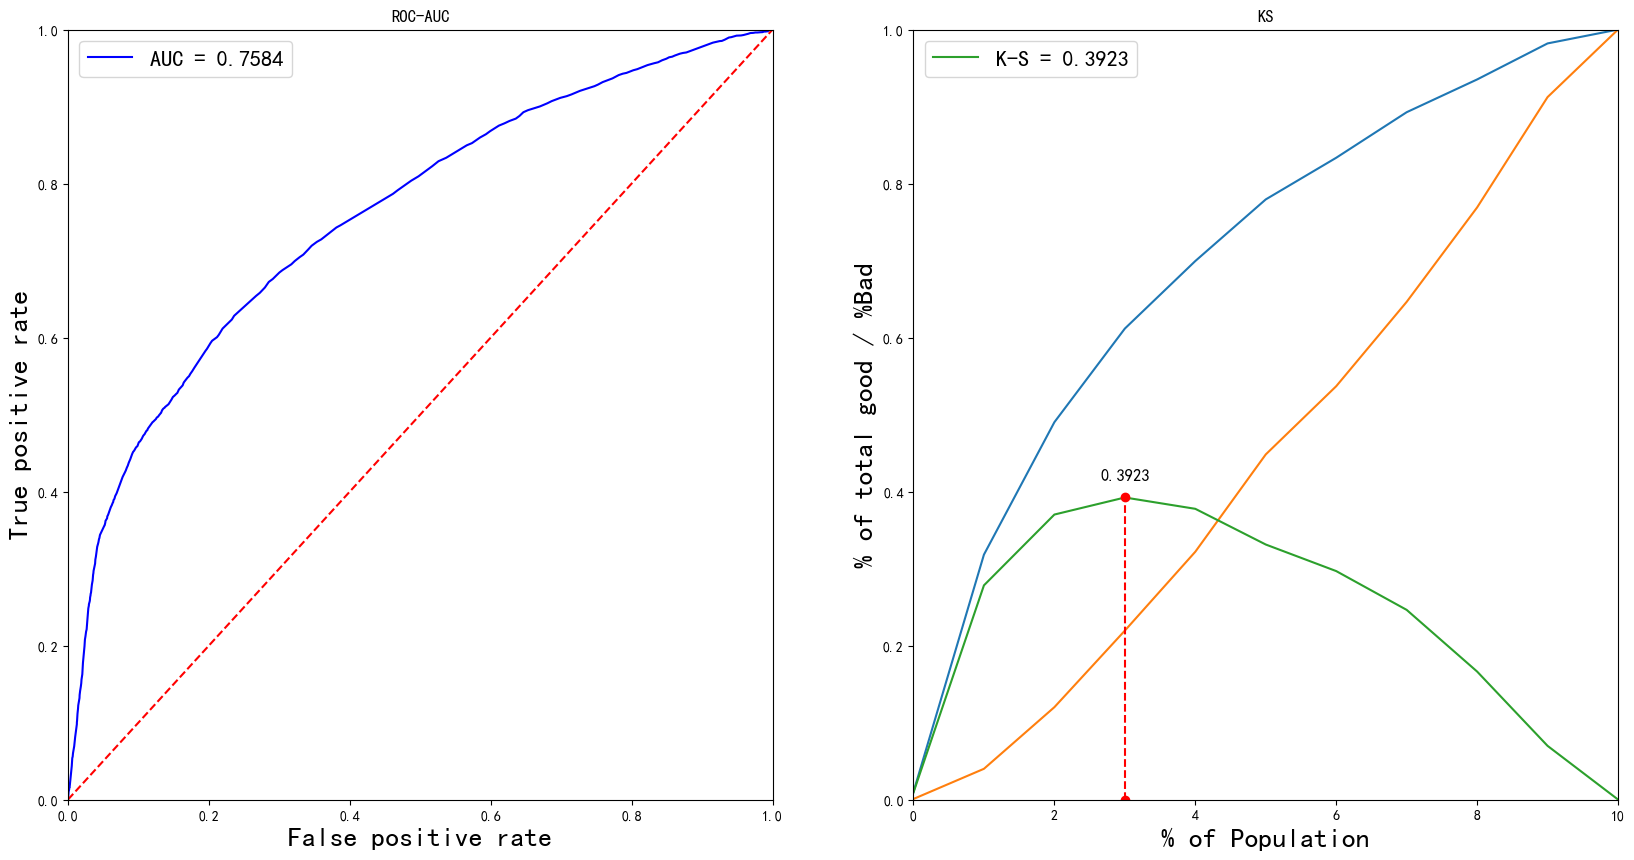

,No.,fpr,tpr,thresholds,ks
0,1,0.000740,0.009927,0.9968,0.009187
1,2,0.039911,0.318071,0.8864,0.278160
2,3,0.119961,0.490073,0.4677,0.370112
3,4,0.219369,0.611629,0.1652,0.392260
4,5,0.321795,0.699352,0.1086,0.377557
5,6,0.448189,0.779376,0.0768,0.331187
6,7,0.536780,0.833468,0.0613,0.296689
7,8,0.646322,0.892626,0.0427,0.246304
8,9,0.768959,0.935170,0.0276,0.166211
9,10,0.912264,0.981969,0.0140,0.069705


In [67]:
# Calculate auc and ks and return ks result data
plot_roc_ks(data_train,scorecard,return_data=True,precision=4)

## AUC calculation

In [68]:
# Calculate auc according to training set and scoring card
get_auc_by_card(data_train,scorecard)

  0%|          | 0/8 [00:00<?, ?it/s]

0.76

In [69]:
# Calculate auc according to the prediction results
get_auc(data_train_score)

0.76

In [70]:
# According to the prediction results, calculate auc and return data
get_auc(data_train_score,return_data=True)

(0.76,
          fpr       tpr  thresholds
 0   0.000000  0.000000        1.82
 1   0.000854  0.010535        0.82
 2   0.001537  0.012763        0.81
 3   0.001936  0.015600        0.80
 4   0.002448  0.018031        0.79
 ..       ...       ...         ...
 75  0.925017  0.985008        0.08
 76  0.965555  0.994530        0.07
 77  0.987873  0.997366        0.06
 78  0.998292  0.999797        0.05
 79  1.000000  1.000000        0.04
 
 [80 rows x 3 columns])

## KS calculation

In [71]:
# Calculate ks according to training set and scoring card
get_ks_by_card(data_train,scorecard)

  0%|          | 0/8 [00:00<?, ?it/s]

0.39

In [72]:
# Calculate ks according to the prediction results
get_ks(data_train_score)

0.39

In [73]:
# Calculate ks and return data according to the prediction results
get_ks(data_train_score,return_data=True)

(0.39,
    No.          Proba  #Total  #Bad  #Good  %Total    %Bad   %Good %BadRate   
 0    1  (0.039, 0.08]    2834   187   2647  12.60%   3.79%  15.07%    6.60%  \
 1    2    (0.08, 0.1]    2360   206   2154  10.49%   4.17%  12.26%    8.73%   
 2    3    (0.1, 0.12]    2245   223   2022   9.98%   4.52%  11.51%    9.93%   
 3    4   (0.12, 0.14]    3076   437   2639  13.67%   8.85%  15.03%   14.21%   
 4    5   (0.14, 0.15]    2080   292   1788   9.24%   5.92%  10.18%   14.04%   
 5    6   (0.15, 0.17]    1260   213   1047   5.60%   4.32%   5.96%   16.90%   
 6    7    (0.17, 0.2]    2296   490   1806  10.20%   9.93%  10.28%   21.34%   
 7    8    (0.2, 0.31]    1894   488   1406   8.42%   9.89%   8.01%   25.77%   
 8    9  (0.31, 0.511]    2205   844   1361   9.80%  17.10%   7.75%   38.28%   
 9   10  (0.511, 0.82]    2250  1556    694  10.00%  31.52%   3.95%   69.16%   
 
    %CumBad %CumGood    KS  
 0    3.79%   15.07%  0.11  
 1    7.96%   27.33%  0.19  
 2   12.48%   38.85%  0.

In [74]:
# Calculate ks and return data according to the prediction results
ks,ks_data = get_ks(data_train_score,return_data=True)
ks_data

,No.,Proba,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,%CumBad,%CumGood,KS
0,1,"(0.039, 0.08]",2834,187,2647,12.60%,3.79%,15.07%,6.60%,3.79%,15.07%,0.11
1,2,"(0.08, 0.1]",2360,206,2154,10.49%,4.17%,12.26%,8.73%,7.96%,27.33%,0.19
2,3,"(0.1, 0.12]",2245,223,2022,9.98%,4.52%,11.51%,9.93%,12.48%,38.85%,0.26
3,4,"(0.12, 0.14]",3076,437,2639,13.67%,8.85%,15.03%,14.21%,21.33%,53.87%,0.33
4,5,"(0.14, 0.15]",2080,292,1788,9.24%,5.92%,10.18%,14.04%,27.25%,64.05%,0.37
5,6,"(0.15, 0.17]",1260,213,1047,5.60%,4.32%,5.96%,16.90%,31.56%,70.01%,0.38
6,7,"(0.17, 0.2]",2296,490,1806,10.20%,9.93%,10.28%,21.34%,41.49%,80.29%,0.39
7,8,"(0.2, 0.31]",1894,488,1406,8.42%,9.89%,8.01%,25.77%,51.38%,88.30%,0.37
8,9,"(0.31, 0.511]",2205,844,1361,9.80%,17.10%,7.75%,38.28%,68.48%,96.05%,0.28
9,10,"(0.511, 0.82]",2250,1556,694,10.00%,31.52%,3.95%,69.16%,100.00%,100.00%,0.00


## View scorecard score distribution and improvement

In [75]:
# View scorecard score distribution and improvement
get_score_dist(data_train_score)

,No.,Score Range,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,%BadRate Random,%CumBad,%CumTotal,Lift
0,1,"(-inf, 503.9]",2250,1556,694,10.00%,31.52%,3.95%,69.16%,21.94%,69.16%,10.00%,6.92
1,2,"(503.9, 567.0]",2276,863,1413,10.12%,17.48%,8.04%,37.92%,21.94%,53.45%,20.12%,2.66
2,3,"(567.0, 610.0]",2346,600,1746,10.43%,12.16%,9.94%,25.58%,21.94%,43.93%,30.54%,1.44
3,4,"(610.0, 624.0]",2232,433,1799,9.92%,8.77%,10.24%,19.40%,21.94%,37.92%,40.46%,0.94
4,5,"(624.0, 635.0]",2615,395,2220,11.62%,8.00%,12.64%,15.11%,21.94%,32.83%,52.08%,0.63
5,6,"(635.0, 642.0]",1823,267,1556,8.10%,5.41%,8.86%,14.65%,21.94%,30.38%,60.19%,0.50
6,7,"(642.0, 653.0]",2216,292,1924,9.85%,5.92%,10.95%,13.18%,21.94%,27.96%,70.04%,0.40
7,8,"(653.0, 666.0]",2364,210,2154,10.51%,4.25%,12.26%,8.88%,21.94%,25.47%,80.54%,0.32
8,9,"(666.0, 686.0]",2748,231,2517,12.21%,4.68%,14.33%,8.41%,21.94%,23.22%,92.76%,0.25
9,10,"(686.0, inf]",1630,89,1541,7.24%,1.80%,8.77%,5.46%,21.94%,21.94%,100.00%,0.22


In [76]:
# View the score distribution and improvement degree of the scorecard, divide it into 5 groups, and view the improvement degree
get_score_dist(data_train_score,qcut=5)

,No.,Score Range,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,%BadRate Random,%CumBad,%CumTotal,Lift
0,1,"(-inf, 567.0]",4526,2419,2107,20.12%,49.01%,12.00%,53.45%,21.94%,53.45%,20.12%,2.66
1,2,"(567.0, 624.0]",4578,1033,3545,20.35%,20.93%,20.18%,22.56%,21.94%,37.92%,40.46%,0.94
2,3,"(624.0, 642.0]",4438,662,3776,19.72%,13.41%,21.50%,14.92%,21.94%,30.38%,60.19%,0.50
3,4,"(642.0, 666.0]",4580,502,4078,20.36%,10.17%,23.22%,10.96%,21.94%,25.47%,80.54%,0.32
4,5,"(666.0, inf]",4378,320,4058,19.46%,6.48%,23.10%,7.31%,21.94%,21.94%,100.00%,0.22


In [77]:
# View the score distribution and improvement degree of the scorecard, divide it into 5 groups, and view the improvement degree
view_score_dist(data_train_score,qcut=5)

,No.,Score Range,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,%BadRate Random,%CumBad,%CumTotal,Lift,Lift.
0,1,"(-inf, 567.0]",4526,2419,2107,20.12%,49.01%,12.00%,53.45%,21.94%,53.45%,20.12%,2.660000,2.660000
1,2,"(567.0, 624.0]",4578,1033,3545,20.35%,20.93%,20.18%,22.56%,21.94%,37.92%,40.46%,0.940000,0.940000
2,3,"(624.0, 642.0]",4438,662,3776,19.72%,13.41%,21.50%,14.92%,21.94%,30.38%,60.19%,0.500000,0.500000
3,4,"(642.0, 666.0]",4580,502,4078,20.36%,10.17%,23.22%,10.96%,21.94%,25.47%,80.54%,0.320000,0.320000
4,5,"(666.0, inf]",4378,320,4058,19.46%,6.48%,23.10%,7.31%,21.94%,21.94%,100.00%,0.220000,0.220000


In [78]:
# View the score distribution and improvement degree of the scorecard, divide it into 5 groups, and view the improvement degree
view_score_dist(data_train_score,qcut=5,color='green')

,No.,Score Range,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,%BadRate Random,%CumBad,%CumTotal,Lift,Lift.
0,1,"(-inf, 567.0]",4526,2419,2107,20.12%,49.01%,12.00%,53.45%,21.94%,53.45%,20.12%,2.660000,2.660000
1,2,"(567.0, 624.0]",4578,1033,3545,20.35%,20.93%,20.18%,22.56%,21.94%,37.92%,40.46%,0.940000,0.940000
2,3,"(624.0, 642.0]",4438,662,3776,19.72%,13.41%,21.50%,14.92%,21.94%,30.38%,60.19%,0.500000,0.500000
3,4,"(642.0, 666.0]",4580,502,4078,20.36%,10.17%,23.22%,10.96%,21.94%,25.47%,80.54%,0.320000,0.320000
4,5,"(666.0, inf]",4378,320,4058,19.46%,6.48%,23.10%,7.31%,21.94%,21.94%,100.00%,0.220000,0.220000


In [79]:
#View the score distribution and improvement degree of the scorecard, divide it into 5 groups, and view the improvement degree
view_score_dist(data_train_score,qcut=5,color='#02B057')

,No.,Score Range,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,%BadRate Random,%CumBad,%CumTotal,Lift,Lift.
0,1,"(-inf, 567.0]",4526,2419,2107,20.12%,49.01%,12.00%,53.45%,21.94%,53.45%,20.12%,2.660000,2.660000
1,2,"(567.0, 624.0]",4578,1033,3545,20.35%,20.93%,20.18%,22.56%,21.94%,37.92%,40.46%,0.940000,0.940000
2,3,"(624.0, 642.0]",4438,662,3776,19.72%,13.41%,21.50%,14.92%,21.94%,30.38%,60.19%,0.500000,0.500000
3,4,"(642.0, 666.0]",4580,502,4078,20.36%,10.17%,23.22%,10.96%,21.94%,25.47%,80.54%,0.320000,0.320000
4,5,"(666.0, inf]",4378,320,4058,19.46%,6.48%,23.10%,7.31%,21.94%,21.94%,100.00%,0.220000,0.220000


In [80]:
# View scorecard score distribution and improvement
get_score_dist(data_train_score)

,No.,Score Range,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,%BadRate Random,%CumBad,%CumTotal,Lift
0,1,"(-inf, 503.9]",2250,1556,694,10.00%,31.52%,3.95%,69.16%,21.94%,69.16%,10.00%,6.92
1,2,"(503.9, 567.0]",2276,863,1413,10.12%,17.48%,8.04%,37.92%,21.94%,53.45%,20.12%,2.66
2,3,"(567.0, 610.0]",2346,600,1746,10.43%,12.16%,9.94%,25.58%,21.94%,43.93%,30.54%,1.44
3,4,"(610.0, 624.0]",2232,433,1799,9.92%,8.77%,10.24%,19.40%,21.94%,37.92%,40.46%,0.94
4,5,"(624.0, 635.0]",2615,395,2220,11.62%,8.00%,12.64%,15.11%,21.94%,32.83%,52.08%,0.63
5,6,"(635.0, 642.0]",1823,267,1556,8.10%,5.41%,8.86%,14.65%,21.94%,30.38%,60.19%,0.50
6,7,"(642.0, 653.0]",2216,292,1924,9.85%,5.92%,10.95%,13.18%,21.94%,27.96%,70.04%,0.40
7,8,"(653.0, 666.0]",2364,210,2154,10.51%,4.25%,12.26%,8.88%,21.94%,25.47%,80.54%,0.32
8,9,"(666.0, 686.0]",2748,231,2517,12.21%,4.68%,14.33%,8.41%,21.94%,23.22%,92.76%,0.25
9,10,"(686.0, inf]",1630,89,1541,7.24%,1.80%,8.77%,5.46%,21.94%,21.94%,100.00%,0.22


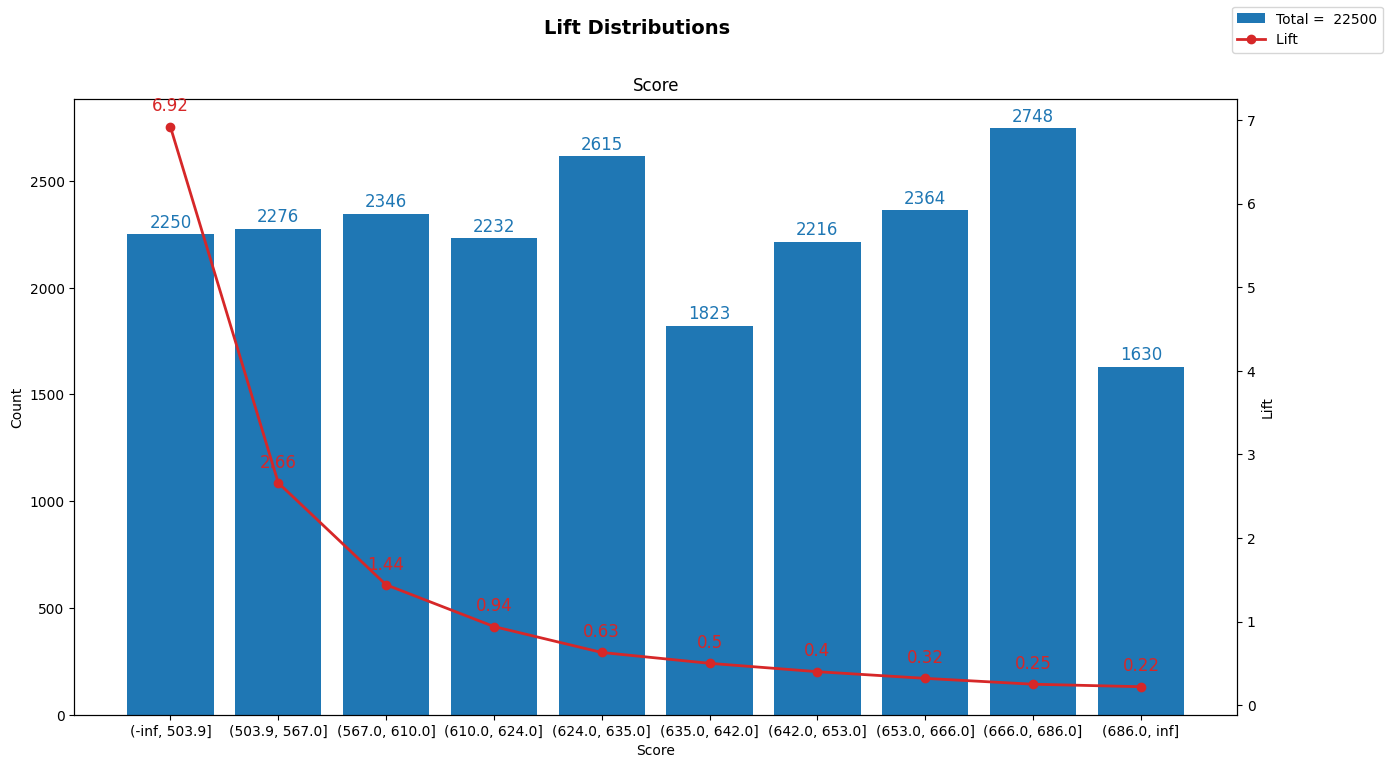

In [81]:
# Draw lifting degree diagram
plot_lift(data_train_score)

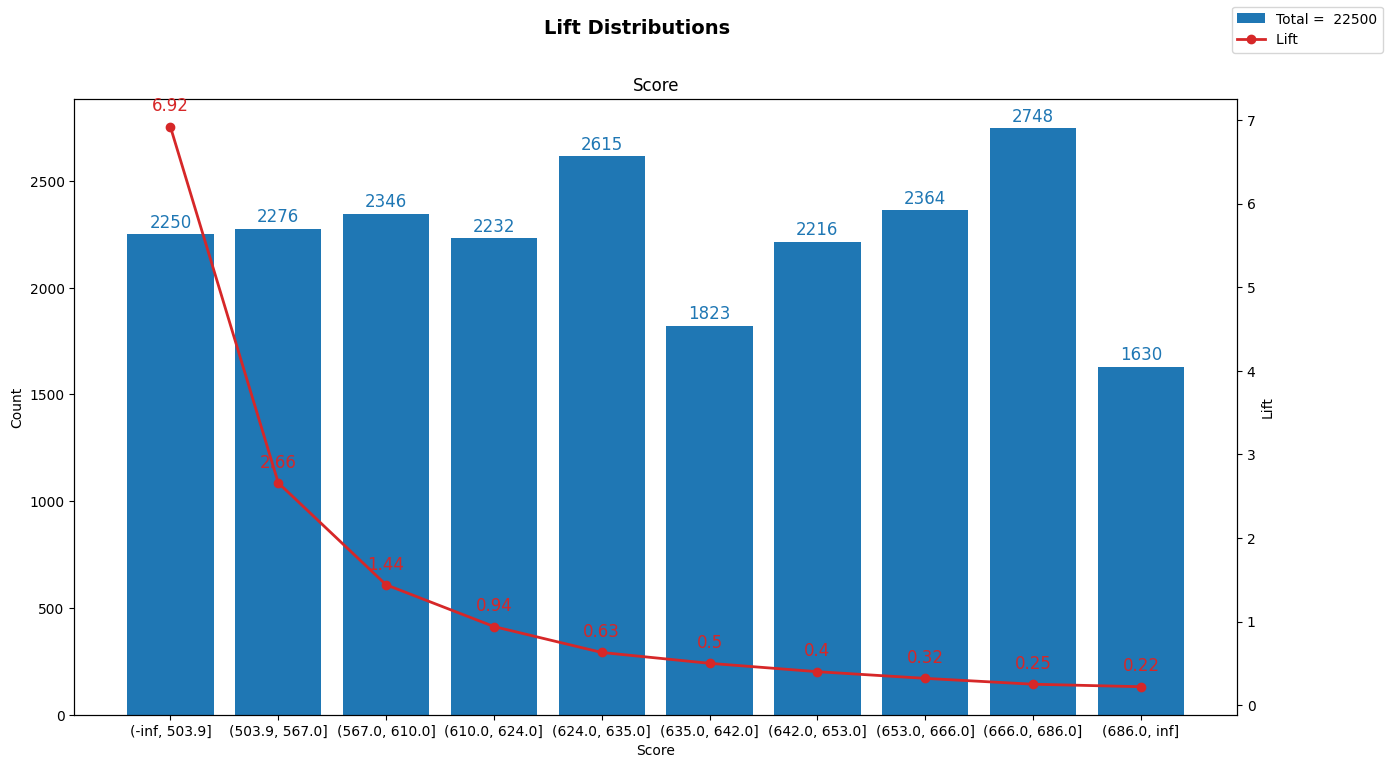

,No.,Score Range,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,%BadRate Random,%CumBad,%CumTotal,Lift
0,1,"(-inf, 503.9]",2250,1556,694,10.00%,31.52%,3.95%,69.16%,21.94%,69.16%,10.00%,6.92
1,2,"(503.9, 567.0]",2276,863,1413,10.12%,17.48%,8.04%,37.92%,21.94%,53.45%,20.12%,2.66
2,3,"(567.0, 610.0]",2346,600,1746,10.43%,12.16%,9.94%,25.58%,21.94%,43.93%,30.54%,1.44
3,4,"(610.0, 624.0]",2232,433,1799,9.92%,8.77%,10.24%,19.40%,21.94%,37.92%,40.46%,0.94
4,5,"(624.0, 635.0]",2615,395,2220,11.62%,8.00%,12.64%,15.11%,21.94%,32.83%,52.08%,0.63
5,6,"(635.0, 642.0]",1823,267,1556,8.10%,5.41%,8.86%,14.65%,21.94%,30.38%,60.19%,0.50
6,7,"(642.0, 653.0]",2216,292,1924,9.85%,5.92%,10.95%,13.18%,21.94%,27.96%,70.04%,0.40
7,8,"(653.0, 666.0]",2364,210,2154,10.51%,4.25%,12.26%,8.88%,21.94%,25.47%,80.54%,0.32
8,9,"(666.0, 686.0]",2748,231,2517,12.21%,4.68%,14.33%,8.41%,21.94%,23.22%,92.76%,0.25
9,10,"(686.0, inf]",1630,89,1541,7.24%,1.80%,8.77%,5.46%,21.94%,21.94%,100.00%,0.22


In [82]:
# Draw lifting degree diagram and output lifting degree table
plot_lift(data_train_score,return_data=True)

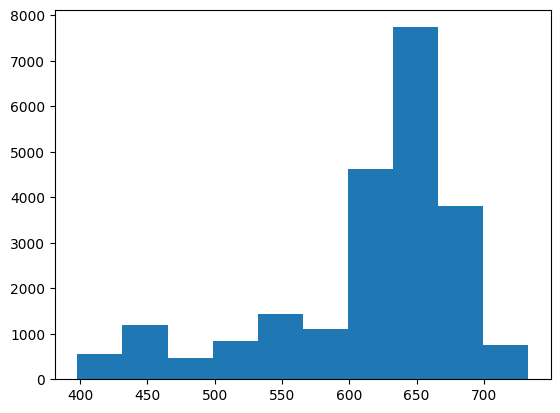

In [83]:
# Scorecard score distribution
import matplotlib.pyplot as plt
plt.style.use('default')
fig=plt.figure()
ax1=fig.add_subplot(1,1,1)
ax1.hist(data_train_score['Score'] )
plt.show()

## Model stability PSI calculation

In [84]:
data_train_score = get_predict_score(data_train,scorecard)
data_test_score = get_predict_score(data_test,scorecard)

# Divide into 10 groups according to the equal frequency sub-box, and calculate the PSI of the model score
get_psi(data_train_score,data_test_score)

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

,No.,Name,Bins Range,#Total,#Actual,#Expected,%Total,%Actual,%Expected,PSI,Total PSI
0,1,Score,"(-inf, 503.9]",3018,2250,768,10.06%,10.00%,10.24%,0.00,0.07
1,2,Score,"(503.9, 567.0]",3026,2276,750,10.09%,10.12%,10.00%,0.00,0.07
2,3,Score,"(567.0, 610.0]",3018,2346,672,10.06%,10.43%,8.96%,0.00,0.07
3,4,Score,"(610.0, 624.0]",2945,2232,713,9.82%,9.92%,9.51%,0.00,0.07
4,5,Score,"(624.0, 635.0]",3065,2615,450,10.22%,11.62%,6.00%,0.04,0.07
5,6,Score,"(635.0, 642.0]",2706,1823,883,9.02%,8.10%,11.77%,0.01,0.07
6,7,Score,"(642.0, 653.0]",3054,2216,838,10.18%,9.85%,11.17%,0.00,0.07
7,8,Score,"(653.0, 666.0]",3151,2364,787,10.50%,10.51%,10.49%,0.00,0.07
8,9,Score,"(666.0, 686.0]",3555,2748,807,11.85%,12.21%,10.76%,0.00,0.07
9,10,Score,"(686.0, inf]",2462,1630,832,8.21%,7.24%,11.09%,0.02,0.07


In [85]:
# Divide into 10 groups according to the equal frequency sub-box, and calculate the PSI of the model score
view_psi(data_train_score,data_test_score)

,No.,Name,Bins Range,#Total,#Actual,#Expected,%Total,%Actual,%Expected,PSI,Total PSI,PSI.
0,1,Score,"(-inf, 503.9]",3018,2250,768,10.06%,10.00%,10.24%,0.000000,0.070000,0.000000
1,2,Score,"(503.9, 567.0]",3026,2276,750,10.09%,10.12%,10.00%,0.000000,0.070000,0.000000
2,3,Score,"(567.0, 610.0]",3018,2346,672,10.06%,10.43%,8.96%,0.000000,0.070000,0.000000
3,4,Score,"(610.0, 624.0]",2945,2232,713,9.82%,9.92%,9.51%,0.000000,0.070000,0.000000
4,5,Score,"(624.0, 635.0]",3065,2615,450,10.22%,11.62%,6.00%,0.040000,0.070000,0.040000
5,6,Score,"(635.0, 642.0]",2706,1823,883,9.02%,8.10%,11.77%,0.010000,0.070000,0.010000
6,7,Score,"(642.0, 653.0]",3054,2216,838,10.18%,9.85%,11.17%,0.000000,0.070000,0.000000
7,8,Score,"(653.0, 666.0]",3151,2364,787,10.50%,10.51%,10.49%,0.000000,0.070000,0.000000
8,9,Score,"(666.0, 686.0]",3555,2748,807,11.85%,12.21%,10.76%,0.000000,0.070000,0.000000
9,10,Score,"(686.0, inf]",2462,1630,832,8.21%,7.24%,11.09%,0.020000,0.070000,0.020000


In [86]:
# Divide into 10 groups according to the equal frequency sub-box, and calculate the PSI of the model score
view_psi(data_train_score,data_test_score,color='#02B057')

,No.,Name,Bins Range,#Total,#Actual,#Expected,%Total,%Actual,%Expected,PSI,Total PSI,PSI.
0,1,Score,"(-inf, 503.9]",3018,2250,768,10.06%,10.00%,10.24%,0.000000,0.070000,0.000000
1,2,Score,"(503.9, 567.0]",3026,2276,750,10.09%,10.12%,10.00%,0.000000,0.070000,0.000000
2,3,Score,"(567.0, 610.0]",3018,2346,672,10.06%,10.43%,8.96%,0.000000,0.070000,0.000000
3,4,Score,"(610.0, 624.0]",2945,2232,713,9.82%,9.92%,9.51%,0.000000,0.070000,0.000000
4,5,Score,"(624.0, 635.0]",3065,2615,450,10.22%,11.62%,6.00%,0.040000,0.070000,0.040000
5,6,Score,"(635.0, 642.0]",2706,1823,883,9.02%,8.10%,11.77%,0.010000,0.070000,0.010000
6,7,Score,"(642.0, 653.0]",3054,2216,838,10.18%,9.85%,11.17%,0.000000,0.070000,0.000000
7,8,Score,"(653.0, 666.0]",3151,2364,787,10.50%,10.51%,10.49%,0.000000,0.070000,0.000000
8,9,Score,"(666.0, 686.0]",3555,2748,807,11.85%,12.21%,10.76%,0.000000,0.070000,0.000000
9,10,Score,"(686.0, inf]",2462,1630,832,8.21%,7.24%,11.09%,0.020000,0.070000,0.020000


In [87]:
data_train_score = get_predict_score(data_train,scorecard)
data_test_score = get_predict_score(data_test,scorecard)

# Divide into 5 groups according to the equal frequency sub-box, and calculate the PSI
get_psi(data_train_score,data_test_score,col='LIMIT_BAL',qcut=5,precision=4)

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

,No.,Name,Bins Range,#Total,#Actual,#Expected,%Total,%Actual,%Expected,PSI,Total PSI
0,1,LIMIT_BAL,"(-inf, 50000.0]",7676,5855,1821,25.5867%,26.0222%,24.2800%,0.0012,0.0018
1,2,LIMIT_BAL,"(50000.0, 100000.0]",4822,3593,1229,16.0733%,15.9689%,16.3867%,0.0001,0.0018
2,3,LIMIT_BAL,"(100000.0, 180000.0]",6123,4548,1575,20.4100%,20.2133%,21.0000%,0.0003,0.0018
3,4,LIMIT_BAL,"(180000.0, 270000.0]",5421,4035,1386,18.0700%,17.9333%,18.4800%,0.0002,0.0018
4,5,LIMIT_BAL,"(270000.0, inf]",5958,4469,1489,19.8600%,19.8622%,19.8533%,0.0000,0.0018


In [88]:
data_train_score = get_predict_score(data_train,scorecard)
data_test_score = get_predict_score(data_test,scorecard)

# Calculate PSI according to the specified cut point
get_psi(data_train_score,data_test_score,col='LIMIT_BAL',bins=[-inf,30000,50000,100000,inf],precision=4)

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

,No.,Name,Bins Range,#Total,#Actual,#Expected,%Total,%Actual,%Expected,PSI,Total PSI
0,1,LIMIT_BAL,"(-inf, 30000.0]",4111,3109,1002,13.7033%,13.8178%,13.3600%,0.0002,0.0002
1,2,LIMIT_BAL,"(30000.0, 50000.0]",3649,2746,903,12.1633%,12.2044%,12.0400%,0.0000,0.0002
2,3,LIMIT_BAL,"(50000.0, 100000.0]",4794,3593,1201,15.9800%,15.9689%,16.0133%,0.0000,0.0002
3,4,LIMIT_BAL,"(100000.0, inf]",17446,13052,4394,58.1533%,58.0089%,58.5867%,0.0001,0.0002


In [89]:
# Batch calculate PSI of all features
data_train_score = get_predict_score(data_train,scorecard)
data_test_score = get_predict_score(data_test,scorecard)

get_data_psi(data_train_score,data_test_score,precision=4)

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

,Name,PSI
16,Score,0.0733
8,PAY_AMT3,0.0026
4,LIMIT_BAL,0.0022
17,Proba,0.0018
6,PAY_AMT2,0.0012
14,PAY_AMT6,0.0011
10,PAY_AMT4,0.0010
12,PAY_AMT5,0.0008
2,PAY_AMT1,0.0006
7,PAY_AMT2_Score,0.0006


## Model application analysis

### Decision tree analysis

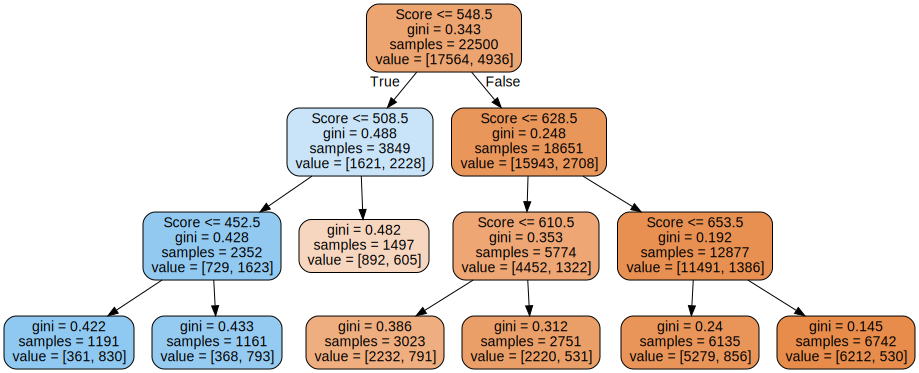

In [90]:
plot_tree(data_train_score[['Score','y']],max_depth=3,criterion='gini')

In [91]:
plot_tree(data_train_score[['Score','y']],max_depth=3,criterion='gini',out_file='test.svg')

0

In [92]:
plot_tree(data_train_score[['Score','y']],max_depth=3,criterion='gini',out_file='test.pdf')

0